# **Pronóstico de Cancelación de Clientes en Interconnect**

----

## **Introducción**

### Pronóstico de cancelación de clientes en Interconnect

El objetivo de este proyecto de Data Science es desarrollar un modelo de pronóstico de la tasa de cancelación de clientes para el operador de telecomunicaciones Interconnect. El propósito es identificar a los usuarios que planean abandonar el servicio y ofrecerles códigos promocionales y opciones de planes especiales para retenerlos.

El equipo de marketing de Interconnect ha recopilado una variedad de datos personales de los clientes, incluyendo información sobre sus planes y contratos. Estos datos se utilizarán para entrenar el modelo de pronóstico y mejorar la retención de clientes.

#### Servicios de Interconnect

Interconnect ofrece principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo: Los teléfonos pueden estar conectados a varias líneas simultáneamente.
2. Internet: La red puede configurarse a través de una línea telefónica (DSL, *línea de abonado digital*) o mediante un cable de fibra óptica.

Además de estos servicios principales, la empresa también ofrece otros servicios, como:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*).

Los clientes pueden elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Se aceptan varios métodos de pago y se emite una factura electrónica después de cada transacción.

#### Descripción de los datos

Los datos utilizados en este proyecto se han obtenido de diferentes fuentes y se encuentran almacenados en los siguientes archivos:

- `contract.csv`: Contiene información sobre los contratos.
- `personal.csv`: Incluye datos personales de los clientes.
- `internet.csv`: Proporciona información sobre los servicios de Internet.
- `phone.csv`: Contiene información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. Es importante destacar que la información del contrato es válida a partir del 1 de febrero de 2020.

---

## **Propuesta de trabajo**

En este apartado se se abordarán dos tareas principales: el análisis exploratorio de los datos y la planificación del proyecto completo. Estas etapas serán fundamentales para desarrollar un modelo de pronóstico de la tasa de cancelación de clientes y brindar recomendaciones a la dirección del proyecto.

### Análisis exploratorio de los datos

En primer lugar, se llevará a cabo un análisis exploratorio exhaustivo de los datos proporcionados por Interconnect. Este análisis permitirá comprender en profundidad las características de los datos y descubrir patrones, tendencias y posibles relaciones relevantes. A partir de este análisis, se generará una lista de preguntas clave que serán abordadas durante el proyecto, con el objetivo de resolverlas y proporcionar información valiosa a la dirección del proyecto.

### Planificación del proyecto

Una vez finalizado el análisis exploratorio de los datos, se procederá a planificar la totalidad del proyecto. Esta etapa incluirá la definición de los pasos a seguir, la selección de las técnicas y algoritmos más adecuados, así como la determinación de los recursos y el cronograma necesario para llevar a cabo el desarrollo del modelo de pronóstico de cancelación de clientes.

El plan del proyecto también contemplará la implementación de estrategias para retener a los clientes identificados como propensos a cancelar el servicio. Esto incluirá la propuesta de códigos promocionales y opciones de planes especiales con el objetivo de mejorar la satisfacción y fidelización de los clientes.

En resumen, este proyecto tiene como objetivo principal pronosticar la tasa de cancelación de clientes en Interconnect, mediante el análisis exploratorio de datos y la implementación de un modelo de pronóstico. Además, se brindará un plan detallado que guiará todas las etapas del proyecto, desde el análisis hasta la implementación de estrategias de retención de clientes.

---

## **Análisis exploratorio de los datos**

In [65]:
# Se importan las librerías necesarias para el proyecto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, mean_absolute_error, roc_auc_score, accuracy_score, roc_curve, auc
from scipy import stats as st
from scipy.stats import levene
from sklearn.utils import resample
from sklearn.model_selection import cross_val_predict

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier

import plotly.graph_objects as go
import plotly.express as px

from collections import defaultdict
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras

In [2]:
# Es necesario importar los datasets de trabajo

try:
    contract= pd.read_csv('contract.csv')
except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')

try:
    internet = pd.read_csv('internet.csv')
except:
    internet = pd.read_csv('/datasets/final_provider/internet.csv')

try:
    personal = pd.read_csv('personal.csv')
except:
    personal = pd.read_csv('/datasets/final_provider/personal.csv')

try:
    phone = pd.read_csv('phone.csv')
except:
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
# Se imprime el tamaño de cada uno de los datasteas para conocer la cantidad de registros y columnas que tiene cada uno

contract.shape, internet.shape, personal.shape, phone.shape

((7043, 8), (5517, 8), (7043, 5), (6361, 2))

### Dataset **contract**

El dataset "contract" contiene información relevante sobre los contratos de los clientes de Interconnect. Este conjunto de datos desempeña un papel fundamental en nuestro proyecto de pronóstico de cancelación de clientes, ya que nos proporciona detalles importantes sobre los contratos, como las fechas de inicio y fin, el tipo de contrato, la facturación sin papel, el método de pago, los cargos mensuales y los cargos totales.

El análisis de este dataset nos permitirá comprender mejor las características de los contratos y descubrir posibles relaciones y patrones que puedan influir en la tasa de cancelación de los clientes. Además, nos ayudará a identificar variables significativas para desarrollar un modelo de pronóstico preciso.

A lo largo de este apartado, exploraremos en detalle el dataset "contract" y realizaremos diversas visualizaciones y análisis estadísticos para obtener información valiosa sobre los contratos de los clientes de Interconnect. Esto nos permitirá formular preguntas clave y desarrollar estrategias efectivas para retener a los clientes y mejorar la satisfacción del servicio.

In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
contract.head()

customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65

Los resultados muestran que el DataFrame tiene 7043 filas y 8 columnas. Las columnas contienen información sobre el ID del cliente, la fecha de inicio del contrato, la fecha de finalización (si corresponde), el tipo de contrato, si el cliente opta por facturación sin papel, el método de pago, los cargos mensuales y los cargos totales.

En cuanto a los tipos de datos, la columna "MonthlyCharges" es de tipo float64, mientras que las demás columnas son de tipo objeto (object). Esto indica que la mayoría de las columnas contienen datos de texto o fechas representadas como cadenas de caracteres.

Antes de decidir las acciones siguientes sobre el dataset, será necesario revisar cada columna del dataset.

#### **Análisis de las columnas del dataset *'contract'***

In [6]:
# Se empezará con 'BeginDate' que es la fecha en la que el cliente empezó a utilizar los servicios de la compañía
print(contract['BeginDate'].describe())

# Y también se revisará la fecha más reciente y la más antigua de la columna
earliest_date = contract['BeginDate'].min()
latest_date = contract['BeginDate'].max()
print('--------------------------')
print("Fecha más antigua:", earliest_date)
print("Fecha más reciente:", latest_date)

# Además de los valores nulos
print('--------------------------')
null_values = contract['BeginDate'].isnull().sum()
print("Cantidad de valores nulos en 'BeginDate':", null_values)


count           7043
unique            77
top       2014-02-01
freq             366
Name: BeginDate, dtype: object
--------------------------
Fecha más antigua: 2013-10-01
Fecha más reciente: 2020-02-01
--------------------------
Cantidad de valores nulos en 'BeginDate': 0


Como se observa, el dato más antiguo del dataset es del primero de octubre de 2013 y el más reciente del primero de febrero de 2020 y no existen valores nulos en esta columna. 

**Decisiones sobre la columna *BeginDate* del dataset *contract***: 
- La columna de fecha de inicio del contrato se cambiará a una de tipo fecha.

In [7]:
# Se continúa con 'EndDate' que es la fecha en la que el cliente empezó a utilizar los servicios de la compañía
print(contract['EndDate'].describe())

# Y también se revisará la fecha más reciente y la más antigua de la columna
earliest_date = contract['EndDate'].min()
latest_date = contract['EndDate'].max()
print('--------------------------')
print("Fecha más antigua:", earliest_date)
print("Fecha más reciente:", latest_date)

# Y los valores únicos que tiene la columna
print('--------------------------')
print("Valores únicos:", contract['EndDate'].unique())
print("Cantidad de valores únicos:", len(contract['EndDate'].unique()))

# Además de los valores nulos
print('--------------------------')
null_values = contract['EndDate'].isnull().sum()
print("Cantidad de valores nulos en 'BeginDate':", null_values)

count     7043
unique       5
top         No
freq      5174
Name: EndDate, dtype: object
--------------------------
Fecha más antigua: 2019-10-01 00:00:00
Fecha más reciente: No
--------------------------
Valores únicos: ['No' '2019-12-01 00:00:00' '2019-11-01 00:00:00' '2019-10-01 00:00:00'
 '2020-01-01 00:00:00']
Cantidad de valores únicos: 5
--------------------------
Cantidad de valores nulos en 'BeginDate': 0


Esta columna es del tipo 'object' por lo que se convertirá a una de tipo fecha. Esta columna tiene la particularidad de únicamente tener cinco valores únicos (No, 2019-12-01, 2019-11-01, 2019-11-01, 2019-10-01 y 2020-01-01), por lo que será necesario preguntar más al respecto.

**Decisiones sobre la columna *EndDate* del dataset *contract***: 
- Se creará una nueva columna llamada 'cancellation_status' basada en la columna 'EndDate'. Esta nueva columna tendrá el valor 0 si el cliente no ha cancelado su plan y 1 si lo ha cancelado.
- La columna que representa la fecha de inicio del contrato se convertirá al tipo de dato fecha.

**Pregunta sobre la columna *EndDate* del dataset *contract***: 
- ¿Por qué únicamente existen cinco valores posibles en esta columna?, ¿Por qué unicamente aparecen fechas de cancelación en octubre, noviembre y diciembre de 2019 y enero 2020 cuando existen clientes desde octubre 2013?

In [8]:
# Se continúa con 'Type' que es el tipo de contrato que tiene el cliente
print(contract['Type'].describe())

# Y los valores únicos que tiene la columna
print('--------------------------')
print("Valores únicos:", contract['Type'].unique())
print("Cantidad de valores únicos:", len(contract['Type'].unique()))

# Además de los valores nulos
print('--------------------------')
null_values = contract['Type'].isnull().sum()
print("Cantidad de valores nulos en 'Type':", null_values)

count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Type, dtype: object
--------------------------
Valores únicos: ['Month-to-month' 'One year' 'Two year']
Cantidad de valores únicos: 3
--------------------------
Cantidad de valores nulos en 'Type': 0


La columna 'Type' indica el tipo de contrato que tiene el cliente: mensual, anual o bianual, por lo que son estos tres los únicos valores presentes en dicha columna. No existen valores ausentes. 

**Decisiones sobre la columna *Type* del dataset *contract***: 
- La columna de tipo de contrato se cambiará a una de tipo 'category' para el ahorro de memoria y mayor eficacia en ciertas operaciones.

In [9]:
# Se continúa con 'PaperlessBilling' que corresponde a si el cliente tiene o no facturación electrónica

# Y los valores únicos que tiene la columna
print('--------------------------')
print("Valores únicos:", contract['PaperlessBilling'].unique())
print("Cantidad de valores únicos:", len(contract['PaperlessBilling'].unique()))

# Además de los valores nulos
print('--------------------------')
null_values = contract['PaperlessBilling'].isnull().sum()
print("Cantidad de valores nulos en 'PaperlessBilling':", null_values)

--------------------------
Valores únicos: ['Yes' 'No']
Cantidad de valores únicos: 2
--------------------------
Cantidad de valores nulos en 'PaperlessBilling': 0


Esta columna relacionada a la facturación electrónica cuenta únicamente con dos valores (Sí o No), y no tiene valores ausentes.

**Decisiones sobre la columna *PaperlessBilling* del dataset *contract***: 
- La columna de facturación electrónica se cambiará a una de tipo 'booleano'.

In [10]:
# Se continúa con los valores únicos de 'PaymentMethod' que corresponde a la forma de pago del cliente    
print('--------------------------')
print("Valores únicos:", contract['PaymentMethod'].unique())
print("Cantidad de valores únicos:", len(contract['PaymentMethod'].unique()))

# Además de los valores nulos
print('--------------------------')
null_values = contract['PaymentMethod'].isnull().sum()
print("Cantidad de valores nulos en 'BeginDate':", null_values)

--------------------------
Valores únicos: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Cantidad de valores únicos: 4
--------------------------
Cantidad de valores nulos en 'BeginDate': 0


Esta columna de tipo de pago tiene cuatro valores únicos: cheque por correo, cheque electrónico, transferencia bancaria automática y domiciliación con tarjeta de crédito. La columna no tiene valores nulos. 6

**Decisiones sobre la columna *PaymentMethod* del dataset *contract***: 
- La columna de forma de pago del cliente se cambiará a una de tipo 'category' para el ahorro de memoria y mayor eficacia en ciertas operaciones.

In [11]:
# Esta columna indica los cargos mensuales que tiene el cliente
print(contract['MonthlyCharges'].describe())

# Se revisará el pago mínimo y más alto de la columna
min_charge = contract['MonthlyCharges'].min()
max_charge = contract['MonthlyCharges'].max()
print('--------------------------')
print("Pago mínimo:", min_charge)
print("Pago máximo:", max_charge)

# Además de los valores nulos
print('--------------------------')
null_values = contract['MonthlyCharges'].isnull().sum()
print("Cantidad de valores nulos en 'MonthlyCharges':", null_values)

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
--------------------------
Pago mínimo: 18.25
Pago máximo: 118.75
--------------------------
Cantidad de valores nulos en 'MonthlyCharges': 0


Esta columna numérica con valores decimales indica el cargo mensual del cliente, y va de los 18.25 y hasta los 118.75. Además, no tiene valores nulos y los datos se encuentran completos.

**Decisiones sobre la columna *MonthlyCharges* del dataset *contract***: 
- Sin modificación.

In [12]:
# Esta columna indica los cargos mensuales que tiene el cliente
print(contract['TotalCharges'].describe())

# Se revisará el pago mínimo y más alto de la columna
contract_min = contract['TotalCharges'].min()
contract_max = contract['TotalCharges'].max()
print('--------------------------')
print("Pago más bajo:", contract_min)
print("Pago más alto:", contract_max)

# Además de los valores nulos 
print('--------------------------')
null_values = contract['TotalCharges'].isnull().sum()
print("Cantidad de valores nulos en 'TotalCharges':", null_values)

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object
--------------------------
Pago más bajo:  
Pago más alto: 999.9
--------------------------
Cantidad de valores nulos en 'TotalCharges': 0


Como se observa, esta columna es de tipo 'object' lo que no permite realizar operaciones matemáticas, por lo que se convertirá a tipo numérico. 

**Decisiones sobre la columna *TotalCharges* del dataset *contract***: 
- Esta columna se cambiará a una de tipo numérico.

**Decisiones sobre el dataset *contract***: 
- La columna de fecha de inicio del contrato se cambiará a una de tipo fecha.
- La columna de fecha de finalización se cambiará a una de tipo fecha (previamente se convertirán a NaN todas las filas con 'No').
- La columna de tipo de contrato se cambiará a una de tipo 'category' para el ahorro de memoria y mayor eficacia en ciertas operaciones.
- La columna de facturación sin papel se cambiará a una de tipo 'boolean'.
- La columna de tipo de pago se cambiará a una de tipo 'category' para el ahorro de memoria y mayor eficacia en ciertas operaciones.
- La columna de cargos totales se convertirá a una de tipo numérico.

In [13]:
# Convertir la columna 'BeginDate' a datetime
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])

# Convertir a NaN aquellos valores que no se puedan convertir a datetime
contract['EndDate'] = contract['EndDate'].replace('No', np.nan)

# Convertir la columna 'EndDate' a datetime
contract['EndDate'] = pd.to_datetime(contract['EndDate'])

# Convertir la columna 'TotalCharges' a float
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

# Convertir las columnas 'Type' y 'PaymentMethod' a tipo 'category'
contract['Type'] = contract['Type'].astype('category')
contract['PaymentMethod'] = contract['PaymentMethod'].astype('category')

# Convertir la columna 'PaperlessBilling' a una de tipo 'boolean'
contract['PaperlessBilling'] = contract['PaperlessBilling'].astype(bool)

# Se revisa el dataset para verificar que los cambios se hayan realizado correctamente
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   bool          
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: bool(1), category(2), datetime64[ns](2), float64(2), object(1)
memory usage: 296.2+ KB


In [14]:
contract.head()

customerID  BeginDate    EndDate            Type  PaperlessBilling  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month              True   
1  5575-GNVDE 2017-04-01        NaT        One year              True   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month              True   
3  7795-CFOCW 2016-05-01        NaT        One year              True   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month              True   

               PaymentMethod  MonthlyCharges  TotalCharges  
0           Electronic check           29.85         29.85  
1               Mailed check           56.95       1889.50  
2               Mailed check           53.85        108.15  
3  Bank transfer (automatic)           42.30       1840.75  
4           Electronic check           70.70        151.65

Como se observa, al realizar las modificaciones en los tipos de columnas, la conversión arrojó datos faltantes en las columnas 'EndDate' y 'TotalCharges'. 

En el caso de 'EndDate' existen 1,869 valores presentes (y 5,174 valores marcados como ausentes que corresponde a 'No'). Mientras en 'TotalCharge' existen 11 valores faltantes que se explorarán a continuación.

In [15]:
# Se revisan los datos de la columna 'TotalCharges' para determinar si es posible reemplazar los valores ausentes por cero
contract[contract['TotalCharges'].isnull()]

customerID  BeginDate EndDate      Type  PaperlessBilling  \
488   4472-LVYGI 2020-02-01     NaT  Two year              True   
753   3115-CZMZD 2020-02-01     NaT  Two year              True   
936   5709-LVOEQ 2020-02-01     NaT  Two year              True   
1082  4367-NUYAO 2020-02-01     NaT  Two year              True   
1340  1371-DWPAZ 2020-02-01     NaT  Two year              True   
3331  7644-OMVMY 2020-02-01     NaT  Two year              True   
3826  3213-VVOLG 2020-02-01     NaT  Two year              True   
4380  2520-SGTTA 2020-02-01     NaT  Two year              True   
5218  2923-ARZLG 2020-02-01     NaT  One year              True   
6670  4075-WKNIU 2020-02-01     NaT  Two year              True   
6754  2775-SEFEE 2020-02-01     NaT  Two year              True   

                  PaymentMethod  MonthlyCharges  TotalCharges  
488   Bank transfer (automatic)           52.55           NaN  
753                Mailed check           20.25           NaN  
936                Mailed check           80.85           NaN  
1082               Mailed check           25.75           NaN  
1340    Credit card (automatic)           56.05           NaN  
3331               Mailed check           19.85           NaN  
3826               Mailed check           25.35           NaN  
4380               Mailed check           20.00           NaN  
5218               Mailed check           19.70           NaN  
6670               Mailed check           73.35           NaN  
6754  Bank transfer (automatic)           61.90           NaN

Como se observa, son 11 los registros que tienen valores ausentes en la columna 'TotalCharges', estos registros corresponden a clientes que tienen un contrato activo, por lo que no es posible reemplazar los valores ausentes por cero, ya que esto afectaría el análisis de los datos. Así mismo, aparece en una sección del proyecto que *"la información del contrato es válida a partir del 1 de febrero de 2020"* por lo que dicha situación hace match con estos 11 datos. En este punto existen dos posibilidades: eliminar los valores ausentes o imputarlos.

In [16]:
# Se revisará el porcentaje de valores ausentes en la columna 'TotalCharges'

totalcharges_missing_percentage = (contract['TotalCharges'].isnull().sum() / len(contract)) * 100
print(f"Porcentaje de valores ausentes en la columna 'TotalCharges': {totalcharges_missing_percentage:.2f}%")

Porcentaje de valores ausentes en la columna 'TotalCharges': 0.16%


Para imputar los valores faltantes, se utilizará el siguiente enfoque: en el caso de los valores faltantes en la columna 'EndDate', se asignará el valor 'No', ya que se asume que si un contrato no tiene una fecha de terminación, el cliente continúa siendo activo.

Por otro lado, los datos faltantes en la columna 'TotalCharges' se reemplazarán con '0', debido a que se supone que corresponden a clientes recientes para quienes aún no se ha generado su primera factura.

In [17]:
# Imputar los valores faltantes en 'TotalCharges' con '0', asumiendo que son clientes recientes sin factura generada
contract['TotalCharges'] = np.where(contract['TotalCharges'].isnull(), 0.00, contract['TotalCharges'])

# Verificar si hay datos nulos o ausentes en el DataFrame
null_counts = contract.isnull().sum()

# Imprimir la cantidad de datos nulos o ausentes por columna
print("Datos nulos o ausentes por columna:")
print(null_counts)

Datos nulos o ausentes por columna:
customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
dtype: int64


In [18]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   bool          
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: bool(1), category(2), datetime64[ns](2), float64(2), object(1)
memory usage: 296.2+ KB


In [19]:
contract.head()

customerID  BeginDate    EndDate            Type  PaperlessBilling  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month              True   
1  5575-GNVDE 2017-04-01        NaT        One year              True   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month              True   
3  7795-CFOCW 2016-05-01        NaT        One year              True   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month              True   

               PaymentMethod  MonthlyCharges  TotalCharges  
0           Electronic check           29.85         29.85  
1               Mailed check           56.95       1889.50  
2               Mailed check           53.85        108.15  
3  Bank transfer (automatic)           42.30       1840.75  
4           Electronic check           70.70        151.65

In [20]:
# Por último, se creará la columna 'cancellation_status' donde se indicará si el cliente canceló o no el contrato (0 es igual a NO ha cancelado y 1 es igual a SÍ ha cancelado)
contract['cancellation_status'] = (contract['EndDate'].notnull()).astype(int)

# Se revisa el dataset para verificar que los cambios se hayan realizado correctamente
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customerID           7043 non-null   object        
 1   BeginDate            7043 non-null   datetime64[ns]
 2   EndDate              1869 non-null   datetime64[ns]
 3   Type                 7043 non-null   category      
 4   PaperlessBilling     7043 non-null   bool          
 5   PaymentMethod        7043 non-null   category      
 6   MonthlyCharges       7043 non-null   float64       
 7   TotalCharges         7043 non-null   float64       
 8   cancellation_status  7043 non-null   int32         
dtypes: bool(1), category(2), datetime64[ns](2), float64(2), int32(1), object(1)
memory usage: 323.7+ KB


In [21]:
contract.head()

customerID  BeginDate    EndDate            Type  PaperlessBilling  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month              True   
1  5575-GNVDE 2017-04-01        NaT        One year              True   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month              True   
3  7795-CFOCW 2016-05-01        NaT        One year              True   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month              True   

               PaymentMethod  MonthlyCharges  TotalCharges  \
0           Electronic check           29.85         29.85   
1               Mailed check           56.95       1889.50   
2               Mailed check           53.85        108.15   
3  Bank transfer (automatic)           42.30       1840.75   
4           Electronic check           70.70        151.65   

   cancellation_status  
0                    0  
1                    0  
2                    1  
3                    0  
4                    1

#### **Visualización de datos del dataset *'contract'***

In [22]:
# Gráfico de barras de los tipos de contrato
type_counts = contract['Type'].value_counts()
type_percentages = type_counts / type_counts.sum() * 100
fig1 = go.Figure(data=go.Bar(x=type_counts.index, y=type_counts.values, text=type_percentages.round(2), textposition='auto'))
fig1.update_layout(title='Distribución de Tipos de Contrato')
fig1.update_traces(texttemplate='%{text:.2f}%', textposition='inside')

# Gráfico de dispersión de los cargos mensuales y los cargos totales
fig2 = go.Figure(data=go.Scatter(x=contract['MonthlyCharges'], y=contract['TotalCharges'], mode='markers'))
fig2.update_layout(title='Cargos Mensuales vs. Cargos Totales', xaxis_title='Cargos Mensuales', yaxis_title='Cargos Totales')

# Gráfico de línea de la evolución de los cargos mensuales a lo largo del tiempo
monthly_charges_over_time = contract.groupby('BeginDate')['MonthlyCharges'].mean().reset_index()
fig3 = go.Figure(data=go.Scatter(x=monthly_charges_over_time['BeginDate'], y=monthly_charges_over_time['MonthlyCharges'], mode='lines'))
fig3.update_layout(title='Cargos Mensuales Promedio a lo Largo del Tiempo', xaxis_title='Fecha de Inicio', yaxis_title='Cargos Mensuales Promedio')

# Gráfico de barras de la cantidad de contratos activos por año
active_contracts_by_year = contract.groupby(contract['BeginDate'].dt.year)['customerID'].count().reset_index()
fig4 = go.Figure(data=go.Bar(x=active_contracts_by_year['BeginDate'], y=active_contracts_by_year['customerID']))
fig4.update_layout(title='Cantidad de Contratos Activos por Año', xaxis_title='Año', yaxis_title='Cantidad')


# Mostrar los gráficos
fig1.show()
fig2.show()
fig3.show()
fig4.show()

##### Resumen de los gráficos

En el análisis del dataset 'contract', se utilizaron cinco gráficos para obtener una visión completa de los datos. 

1. **Distribución de Tipos de Contrato**: La mayoría de los clientes tienen contratos de corto plazo, siendo "Month-to-month" el tipo más común.

2. **Cargos Mensuales vs. Cargos Totales**: Existe una fuerte correlación positiva entre los cargos mensuales y los cargos totales, indicando que los clientes con cargos mensuales más altos acumulan mayores cargos totales.

3. **Cargos Mensuales Promedio a lo Largo del Tiempo**: Los cargos mensuales muestran una tendencia descendente gradual a lo largo del tiempo. Esto podría ser atribuido a la mayor competencia y la disponibilidad de una variedad de planes telefónicos e de internet en el mercado.

4. **Número de Contratos Activos por Año**: El número de contratos activos ha experimentado una disminución en los años 2015 y 2016 en comparación con el año 2014. Sin embargo, a partir de 2017 ha habido un aumento constante en el número de contratos activos. Es importante tener en cuenta que los datos para el año 2020 solo abarcan hasta febrero, lo que explica la disminución en comparación con los años anteriores.

Estos gráficos proporcionan una visión detallada del dataset 'contract' y son útiles para comprender la distribución de tipos de contrato, la preferencia de facturación, la relación entre los cargos mensuales y totales, la evolución de los cargos a lo largo del tiempo y la cantidad de contratos activos en diferentes años.


#### **Preguntas del dataset *contract*** 

**Pregunta sobre la columna *EndDate* del dataset *contract***: 
- ¿Por qué únicamente existen cinco valores posibles en esta columna?, ¿Por qué unicamente aparecen fechas de cancelación en octubre, noviembre y diciembre de 2019 y enero 2020 cuando existen clientes desde octubre 2013?

**Pregunta sobre la columna *EndDate* del dataset *contract***: 
- ¿Por qué únicamente existen cinco valores posibles en esta columna?, ¿Por qué unicamente aparecen fechas de cancelación en octubre, noviembre y diciembre de 2019 y enero 2020 cuando existen clientes desde octubre 2013?

Por último, será necesario realizar los cambios de los títulos de las columnas según snake case (el cual es una convención de escritura de palabras en ciencias de datos donde las palabras se escriben en minúsculas y se separan mediante guiones bajos).

In [23]:
new_columns = {
    'customerID': 'customer_id',
    'BeginDate': 'begin_date',
    'EndDate': 'end_date',
    'Type': 'contract_type',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges'
}

contract.rename(columns=new_columns, inplace=True)

In [24]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          7043 non-null   object        
 1   begin_date           7043 non-null   datetime64[ns]
 2   end_date             1869 non-null   datetime64[ns]
 3   contract_type        7043 non-null   category      
 4   paperless_billing    7043 non-null   bool          
 5   payment_method       7043 non-null   category      
 6   monthly_charges      7043 non-null   float64       
 7   total_charges        7043 non-null   float64       
 8   cancellation_status  7043 non-null   int32         
dtypes: bool(1), category(2), datetime64[ns](2), float64(2), int32(1), object(1)
memory usage: 323.7+ KB


----

### Dataset **internet**

In [25]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [26]:
internet.head()

customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No

Como se observa, el dataset "internet" es un conjunto de datos que contiene información sobre el servicio de internet de los clientes. Tiene un total de 5,517 filas y 8 columnas. A continuación se presenta una descripción de las columnas del dataset:

1. **customerID**: Identificador único de cada cliente.
2. **InternetService**: Tipo de servicio de internet utilizado por el cliente (DSL o fibra óptica).
3. **OnlineSecurity**: Indica si el cliente tiene o no seguridad en línea.
4. **OnlineBackup**: Indica si el cliente tiene o no respaldo en línea.
5. **DeviceProtection**: Indica si el cliente tiene o no protección para sus dispositivos.
6. **TechSupport**: Indica si el cliente tiene o no soporte técnico.
7. **StreamingTV**: Indica si el cliente tiene o no servicio de transmisión de televisión.
8. **StreamingMovies**: Indica si el cliente tiene o no servicio de transmisión de películas.

Si comparamos este dataset con el de 'contract', existen 1,526 datos faltantes en cada una de las columnas (versus los 7,043 de aquel).

In [27]:
# Crear un nuevo DataFrame solo con las columnas a analizar (excluyendo 'customerID')
columns_to_analyze = internet[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]

# Obtener la cantidad de valores únicos en cada columna
unique_counts = columns_to_analyze.nunique()

# Obtener la frecuencia de cada valor en cada columna
value_counts = columns_to_analyze.apply(pd.Series.value_counts)

# Calcular el porcentaje de presencia de cada valor en cada columna
value_percentages = value_counts / len(columns_to_analyze) * 100

# Imprimir los resultados
print("Cantidad de valores únicos en cada columna:")
print(unique_counts)
print("\nFrecuencia de cada valor en cada columna:")
print(value_counts)
print("\nPorcentaje de presencia de cada valor en cada columna:")
print(value_percentages)

Cantidad de valores únicos en cada columna:
InternetService     2
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
dtype: int64

Frecuencia de cada valor en cada columna:
             InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
DSL                   2421.0             NaN           NaN               NaN   
Fiber optic           3096.0             NaN           NaN               NaN   
No                       NaN          3498.0        3088.0            3095.0   
Yes                      NaN          2019.0        2429.0            2422.0   

             TechSupport  StreamingTV  StreamingMovies  
DSL                  NaN          NaN              NaN  
Fiber optic          NaN          NaN              NaN  
No                3473.0       2810.0           2785.0  
Yes               2044.0       2707.0           2732.0  

Porcentaje de presencia de cada valor en cada columna:
    

Como se observa en los resultados, seis columnas tienen como valores posibles sí o no, mientras que la columna 'InternetService' tiene también dos valores (DSL o Fiber Optic). 

En dichas seis columnas, los valores relacionados a no contar con el servicio son mayores en todos los casos que el sí. 



#### **Preguntas del dataset *internet*** 

**Pregunta sobre las columnas *InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV y StreamingMovies* del dataset *internet***: 
- ¿Cuál es el costo por el pago mensual de cada uno de los seis servicios? 
- ¿Existe incrementos en el costo de dichos servicios a lo largo del tiempo y cuál ha sido? Si se considera que que existen clientes desde 2013 y en todos los negocios a nivel mundial existen aumentos en el costo de servicios por temas de inflación y otras cuestiones.

**Pregunta sobre la columna *InternetService* del dataset *internet***: 
- ¿Por qué existen únicamente 5,517 filas en el dataset cuando en el dataset de 'contract' son 7,043?
- ¿Cuál es el pago mensual que se realiza por el servicio de fibra óptica y por el de DSL? 
- ¿Cuáles, cómo y en qué fecha han sido los aumentos en el servicio de internet de ambos servicios a lo largo del tiempo?

#### **Decisiones sobre el dataset *internet***: 

A excepción de 'customerID', se convertirán el resto de columnas a tipo 'booleano'. En este momento, no es necesario realizar modificaciones. Sin embargo, para las columnas relacionadas con el servicio de internet ('InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'), estas podrían ser características relevantes para predecir la cancelación del cliente. Por lo tanto, se convertirán más adelante en variables dummy utilizando la codificación one-hot.

La codificación one-hot es un proceso que crea nuevas columnas binarias para cada categoría en las columnas mencionadas anteriormente. Estas nuevas columnas representarán si un cliente tiene o no el servicio correspondiente. Al utilizar la codificación one-hot, se proporcionará información más estructurada y adecuada para los modelos de predicción, como la predicción de cancelación de clientes.

Posteriormente, se crearán las columnas 'num_additional_services' y 'has_additional_services' para indicar cuántos servicios tiene contratado el usuario y si tiene servicios contratados, respectivamente.

In [28]:
# Convertir las columnas 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' y 'StreamingMovies' a tipo booleano
columns_to_convert = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in columns_to_convert:
    internet[column] = internet[column].map({'Yes': True, 'No': False})

# Revisar el dataset para verificar que los cambios se hayan realizado correctamente
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   bool  
 3   OnlineBackup      5517 non-null   bool  
 4   DeviceProtection  5517 non-null   bool  
 5   TechSupport       5517 non-null   bool  
 6   StreamingTV       5517 non-null   bool  
 7   StreamingMovies   5517 non-null   bool  
dtypes: bool(6), object(2)
memory usage: 118.7+ KB


In [29]:
internet.head()

customerID InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0  7590-VHVEG             DSL           False          True             False   
1  5575-GNVDE             DSL            True         False              True   
2  3668-QPYBK             DSL            True          True             False   
3  7795-CFOCW             DSL            True         False              True   
4  9237-HQITU     Fiber optic           False         False             False   

   TechSupport  StreamingTV  StreamingMovies  
0        False        False            False  
1        False        False            False  
2        False        False            False  
3         True        False            False  
4        False        False            False

Será necesario cambiar los títulos actuales de las columnas por aquellos que tomen en consideración snake case. 

In [30]:
# Definir el diccionario de mapeo de nombres de columnas
new_columns = {
    'customerID': 'customer_id',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies'
}

# Renombrar las columnas en el DataFrame 'contract'
internet.rename(columns=new_columns, inplace=True)

In [31]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   bool  
 3   online_backup      5517 non-null   bool  
 4   device_protection  5517 non-null   bool  
 5   tech_support       5517 non-null   bool  
 6   streaming_tv       5517 non-null   bool  
 7   streaming_movies   5517 non-null   bool  
dtypes: bool(6), object(2)
memory usage: 118.7+ KB


In [32]:
internet.head()

customer_id internet_service  online_security  online_backup  \
0  7590-VHVEG              DSL            False           True   
1  5575-GNVDE              DSL             True          False   
2  3668-QPYBK              DSL             True           True   
3  7795-CFOCW              DSL             True          False   
4  9237-HQITU      Fiber optic            False          False   

   device_protection  tech_support  streaming_tv  streaming_movies  
0              False         False         False             False  
1               True         False         False             False  
2              False         False         False             False  
3               True          True         False             False  
4              False         False         False             False

Por último, se crearán dos columnas para identificar cuántos servicios adicionales de internet tiene cada cliente ('num_aditional_services') y otra que indique si el usuario tiene o no servicios adicionales ('has_aditional_services')

In [33]:
# Crear columna que cuente cuántos servicios adicionales de internet tiene cada cliente
internet_data = internet[['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']]
internet['num_additional_services'] = internet_data.apply(lambda row: row.sum(), axis=1)

# Crear columna que indique si tiene o no servicios adicionales de internet
internet['has_additional_services'] = internet['num_additional_services'].apply(lambda x: 1 if x > 0 else 0)

In [34]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customer_id              5517 non-null   object
 1   internet_service         5517 non-null   object
 2   online_security          5517 non-null   bool  
 3   online_backup            5517 non-null   bool  
 4   device_protection        5517 non-null   bool  
 5   tech_support             5517 non-null   bool  
 6   streaming_tv             5517 non-null   bool  
 7   streaming_movies         5517 non-null   bool  
 8   num_additional_services  5517 non-null   int64 
 9   has_additional_services  5517 non-null   int64 
dtypes: bool(6), int64(2), object(2)
memory usage: 204.9+ KB


In [35]:
internet.head()

customer_id internet_service  online_security  online_backup  \
0  7590-VHVEG              DSL            False           True   
1  5575-GNVDE              DSL             True          False   
2  3668-QPYBK              DSL             True           True   
3  7795-CFOCW              DSL             True          False   
4  9237-HQITU      Fiber optic            False          False   

   device_protection  tech_support  streaming_tv  streaming_movies  \
0              False         False         False             False   
1               True         False         False             False   
2              False         False         False             False   
3               True          True         False             False   
4              False         False         False             False   

   num_additional_services  has_additional_services  
0                        1                        1  
1                        2                        1  
2                        2                        1  
3                        3                        1  
4                        0                        0

### Dataset **personal**

El objetivo del análisis exploratorio de este dataset es comprender mejor las características personales de los clientes y evaluar su relación con la cancelación del servicio. A partir de estas características, se podrán realizar predicciones y tomar decisiones basadas en los resultados obtenidos.

In [36]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [37]:
personal.head()

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

El dataset "personal" es un conjunto de datos que contiene información personal de los clientes. Tiene un total de 7,043 filas y 5 columnas. A continuación se presenta una descripción de las columnas del dataset:

1. customerID: Identificador único de cada cliente.
2. gender: Sexo del cliente.
3. SeniorCitizen: Indica si el cliente es un ciudadano mayor (1) o no (0).
4. Partner: Indica si el cliente tiene una pareja o no.
5. Dependents: Indica si el cliente tiene dependientes o no.

En este dataset, todas las columnas son de tipo 'object', excepto la columna 'SeniorCitizen', que es de tipo 'int64'. 

In [38]:
# Crear un nuevo DataFrame solo con las columnas a analizar
columns_to_analyze = personal[['gender', 'SeniorCitizen', 'Partner', 'Dependents']]

# Obtener la cantidad de valores únicos en cada columna
unique_counts = columns_to_analyze.nunique()

# Obtener la frecuencia de cada valor en cada columna
value_counts = columns_to_analyze.apply(pd.Series.value_counts)

# Calcular el porcentaje de presencia de cada valor en cada columna
value_percentages = value_counts / len(columns_to_analyze) * 100

# Imprimir los resultados
print("Cantidad de valores únicos en cada columna:")
print(unique_counts)
print("\nFrecuencia de cada valor en cada columna:")
print(value_counts)
print("\nPorcentaje de presencia de cada valor en cada columna:")
print(value_percentages)


Cantidad de valores únicos en cada columna:
gender           2
SeniorCitizen    2
Partner          2
Dependents       2
dtype: int64

Frecuencia de cada valor en cada columna:
        gender  SeniorCitizen  Partner  Dependents
Male    3555.0            NaN      NaN         NaN
Female  3488.0            NaN      NaN         NaN
0          NaN         5901.0      NaN         NaN
1          NaN         1142.0      NaN         NaN
No         NaN            NaN   3641.0      4933.0
Yes        NaN            NaN   3402.0      2110.0

Porcentaje de presencia de cada valor en cada columna:
          gender  SeniorCitizen   Partner  Dependents
Male    50.47565            NaN       NaN         NaN
Female  49.52435            NaN       NaN         NaN
0            NaN      83.785319       NaN         NaN
1            NaN      16.214681       NaN         NaN
No           NaN            NaN  51.69672   70.041176
Yes          NaN            NaN  48.30328   29.958824


Como se puede observar (a excepción de 'customerID'), el resto de las otras cuatro columnas tienen dos posibles opciones de respuesta. 

La columna 'gender' tiene los valores de hombre o mujer, 'SeniorCitizen' el valor 0 y 1 que probablemente representa el primero a 'No' y el segundo al 'Sí' (debido al porcentaje de 83.78 versus 16.21). En 'Partner' y en 'Dependents' respuestas posibles son 'No' y 'Sí'. 

#### **Preguntas del dataset *personal*** 

**Pregunta sobre las columnas *SeniorCitizen* del dataset *personal***: 
- ¿A partir de qué edad se considera SeniorCitizen y cuál es la importancia de preguntar sobre esta característica?, ¿se obtendrá un descuento por ser cliente de la tercera edad o existen beneficios adicionales?

**Preguntas sobre la columnas *Partner* y *Dependents* del dataset *personal***: 
- ¿Por qué es relevante conocer la información sobre si te tiene pareja y el número de dependientes?, ¿está relacionada en algo con posibilidad de tener múltiples líneas? 

**Decisiones sobre el dataset *internet***: 

La columna 'gender' se convertirá a una de tipo 'category'. Esta transformación no afecta negativamente la capacidad de realizar predicciones o cálculos de métricas de evaluación. De hecho, puede ser beneficiosa en términos de ahorro de memoria y mejora del rendimiento en ciertas operaciones. Por otro lado, las columnas restantes con valores 0 y 1 se convertirán en columnas de tipo booleano. Esta transformación permitirá un manejo más eficiente de los datos y facilitará su interpretación en el contexto del problema.

In [39]:
# Convertir la columna 'gender' a categoría
personal['gender'] = personal['gender'].astype('category')

# Convertir la columna 'SeniorCitizen' a booleano
personal['SeniorCitizen'] = personal['SeniorCitizen'].astype('bool')

# Convertir la columna 'Partner' a booleano
personal['Partner'] = personal['Partner'].astype('bool')

# Convertir la columna 'Dependents' a booleano
personal['Dependents'] = personal['Dependents'].astype('bool')

# Revisar el dataset para verificar que los cambios se hayan realizado correctamente
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customerID     7043 non-null   object  
 1   gender         7043 non-null   category
 2   SeniorCitizen  7043 non-null   bool    
 3   Partner        7043 non-null   bool    
 4   Dependents     7043 non-null   bool    
dtypes: bool(3), category(1), object(1)
memory usage: 82.8+ KB


Por último, se realizará la mejora de la redacción renombrando las columnas utilizando la convención de snake case. Esto permitirá una lectura más ágil y uniforme de los títulos de todas las columnas.

In [40]:
# Definir el diccionario de mapeo de nombres de columnas
new_columns = {
    'customerID': 'customer_id',
    'gender': 'gender',
    'SeniorCitizen': 'senior_citizen',
    'Partner': 'partner',
    'Dependents': 'dependents'
}

# Renombrar las columnas en el DataFrame 'personal'
personal.rename(columns=new_columns, inplace=True)

In [41]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   customer_id     7043 non-null   object  
 1   gender          7043 non-null   category
 2   senior_citizen  7043 non-null   bool    
 3   partner         7043 non-null   bool    
 4   dependents      7043 non-null   bool    
dtypes: bool(3), category(1), object(1)
memory usage: 82.8+ KB


### Dataset **phone**

In [42]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [43]:
phone.head()

customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

El dataset "phone" es un conjunto de datos que contiene información sobre el servicio de telefonía de los clientes. Tiene un total de 6,361 filas y 2 columnas. A continuación se presenta una descripción de las columnas del dataset:

1. customerID: Identificador único de cada cliente.
2. MultipleLines: Indica si el cliente tiene o no múltiples líneas telefónicas.

Ambas columnas están representadas como tipo 'object' en el DataFrame.

In [44]:
# Es necesario revisar los valores únicos de la columna 'MultipleLines' para determinar si es necesario realizar algún cambio
phone['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

Como se observa, existen dos valores únicos en esta columna y se refiere a si el cliente cuenta o no con múltiples líneas.

#### **Preguntas del dataset *phone*** 

**Pregunta sobre las columnas *MultipleLines* del dataset *phone***: 
- ¿Cómo se desglosa cuántas líneas tiene cada cliente (si se entiende que por múltiples líneas hace referencia a dos o más líneas cargadas a su cuenta)?
- ¿Cómo se desglosa cuántos servicios adicionales tiene cada uno de los clientes con múltiples líneas? 
- ¿Cómo se observa las fechas de alta y baja (y modificaciones de los planes de telefonía) a lo largo del tiempo de las líneas adicionales?
- ¿Cómo se observa el costo mensual que cada cliente pagó por su línea principal y adicionales a lo largo de la historia del contrato?, ¿cómo han sido las aumentos en los costos de cada línea desde el mes 1 de cada contrato?

**Decisiones sobre el dataset *phone***: 

La columna 'MultipleLines' se convertirá a una de tipo 'bool'. Esta transformación ofrece beneficios significativos en el manejo y procesamiento de los datos. Al tener una variable binaria que indica si el cliente tiene o no múltiples líneas telefónicas, el uso de un tipo de datos booleano facilita la interpretación y comprensión del conjunto de datos. Además, la representación booleana utiliza menos memoria en comparación con otros tipos de datos, lo que resulta en un consumo de memoria más eficiente.

In [45]:
# Convertir la columna 'MultipleLines' a booleano
phone['MultipleLines'] = phone['MultipleLines'].map({'Yes': True, 'No': False})

# Revisar el dataset para verificar los cambios
print(phone.info())
print(phone)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 56.0+ KB
None
      customerID  MultipleLines
0     5575-GNVDE          False
1     3668-QPYBK          False
2     9237-HQITU          False
3     9305-CDSKC           True
4     1452-KIOVK           True
...          ...            ...
6356  2569-WGERO          False
6357  6840-RESVB           True
6358  2234-XADUH           True
6359  8361-LTMKD           True
6360  3186-AJIEK          False

[6361 rows x 2 columns]


In [46]:
phone.head()

customerID  MultipleLines
0  5575-GNVDE          False
1  3668-QPYBK          False
2  9237-HQITU          False
3  9305-CDSKC           True
4  1452-KIOVK           True

In [47]:
# Definir el diccionario de mapeo de nombres de columnas
new_columns = {
    'customerID': 'customer_id',
    'MultipleLines': 'multiple_lines'
}

# Renombrar las columnas en el DataFrame 'phone'
phone.rename(columns=new_columns, inplace=True)

In [48]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 56.0+ KB


----

## **Preguntas sobre cada dataset del proyecto**

**Dataset *contract*:** 

**Pregunta sobre la columna *EndDate* del dataset *contract***: 
- ¿Por qué únicamente existen cinco valores posibles en esta columna?, ¿Por qué unicamente aparecen fechas de cancelación en octubre, noviembre y diciembre de 2019 y enero 2020 cuando existen clientes desde octubre 2013?

**Pregunta sobre la columna *TotalCharge* del dataset *contract***: 
- ¿Qué relación existe entre los datos ausentes y que la totalidad de los 11 tengan como fecha de inicio del contrato el 2020-02-01? 

**Dataset *internet*:** 

**Pregunta sobre las columnas *InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV y StreamingMovies* del dataset *internet***: 
- ¿Cuál es el costo por el pago mensual de cada uno de los seis servicios? 
- ¿Existe incrementos en el costo de dichos servicios a lo largo del tiempo y cuál ha sido? Si se considera que que existen clientes desde 2013 y en todos los negocios a nivel mundial existen aumentos en el costo de servicios por temas de inflación y otras cuestiones.

**Pregunta sobre la columna *InternetService* del dataset *internet***: 
- ¿Por qué existen únicamente 5,517 filas en el dataset cuando en el dataset de 'contract' son 7,043?
- ¿Cuál es el pago mensual que se realiza por el servicio de fibra óptica y por el de DSL? 
- ¿Cuáles, cómo y en qué fecha han sido los aumentos en el servicio de internet de ambos servicios a lo largo del tiempo?

**Dataset *personal*:** 

**Pregunta sobre las columnas *SeniorCitizen* del dataset *personal***: 
- ¿A partir de qué edad se considera SeniorCitizen y cuál es la importancia de preguntar sobre esta característica?, ¿se obtendrá un descuento por ser cliente de la tercera edad o existen beneficios adicionales?

**Preguntas sobre la columnas *Partner* y *Dependents* del dataset *personal***: 
- ¿Por qué es relevante conocer la información sobre si te tiene pareja y el número de dependientes?, ¿está relacionada en algo con posibilidad de tener múltiples líneas?     

**Dataset *phone*:** 

**Pregunta sobre las columnas *MultipleLines* del dataset *phone***: 
- ¿Cómo se desglosa cuántas líneas tiene cada cliente (si se entiende que por múltiples líneas hace referencia a dos o más líneas cargadas a su cuenta)?
- ¿Cómo se desglosa cuántos servicios adicionales tiene cada uno de los clientes con múltiples líneas? 
- ¿Cómo se observa las fechas de alta y baja (y modificaciones de los planes de telefonía) a lo largo del tiempo de las líneas adicionales?
- ¿Cómo se observa el costo mensual que cada cliente pagó por su línea principal y adicionales a lo largo de la historia del contrato?, ¿cómo han sido las aumentos en los costos de cada línea desde el mes 1 de cada contrato?

-----

## **Pasos siguientes a realizar en el proyecto**

### Preprocesamiento de los datos

1. Es necesario obtener respuestas a las preguntas planteadas anteriormente para definir los siguientes pasos en el procesamiento de los datos.
2. Una vez definidos, se debe verificar la viabilidad de combinar los cuatro conjuntos de datos en uno. Es importante tener en cuenta que los conjuntos de datos 'contract' y 'personal' tienen 7,043 filas cada uno, mientras que 'phone' tiene 6,361 filas e 'internet' tiene 5,517 filas.
4. Utilizando las columnas 'begin_date' y 'end_date', se calculará la duración del contrato de cada cliente en días, meses y años (si se dispone de la información de inicio y finalización).
5. Una vez completados los pasos anteriores, se generará un nuevo conjunto de datos que incluya los cuatro conjuntos iniciales y se procederá a revisar los valores ausentes que surjan de esta unión.

### Análisis exploratorio de los datos

1. Se examinará la información demográfica para determinar su relevancia en la predicción de la cancelación de contratos por parte de los clientes.
2. Se analizarán los dos tipos de servicios de internet (DSL y fibra óptica) para determinar si alguno de ellos tiene una tasa de cancelación más alta y para identificar las características distintivas de los clientes de cada servicio.
3. Se investigará si el precio de los servicios adicionales es un factor relevante para predecir la cancelación de contratos, agrupándolos y realizando correlaciones con la cancelación.
4. Se explorará si tener un contrato con múltiples líneas aumenta la probabilidad de cancelación.
5. Se examinará si la duración del contrato, calculada a partir de la columna con los días/semanas/meses de vigencia, puede utilizarse para determinar la retención de los clientes.

### Modelos a desarrollar

Para el pronóstico de cancelación de clientes, se pueden desarrollar varios modelos utilizando técnicas de aprendizaje automático:

1. Regresión logística
2. Árboles de decisión
3. Bosques aleatorios
4. XGBoost
5. CatBoost
6. LightGBM

Es importante destacar que la característica objetivo es la columna 'end_date' con el valor 'no'. La métrica principal a utilizar es el AUC-ROC, y se puede considerar la exactitud como métrica adicional.

--------

## **Preprocesamiento de los datos**

Una vez realizada una exploración preliminar de los cuatro datasets, identificando preguntas relevantes y aplicando la convención de snake case para los nombres de las columnas, el siguiente paso en el procesamiento de los datos es combinar los cuatro datasets en uno único. A continuación, se abordará el manejo de los valores ausentes, teniendo en cuenta que los datasets 'contract' y 'personal' tienen 7,043 filas, 'phone' tiene 6,361 filas e 'internet' tiene 5,517 filas.

Posteriormente, se realizará una revisión de las columnas para determinar su relevancia en la tarea de pronosticar la tasa de cancelación de clientes. Se evaluará la necesidad de descartar columnas irrelevantes y se aplicará el One Hot Encoding en aquellas columnas que sea necesario para mejorar la calidad del modelo.

Este proceso de procesamiento de datos es fundamental para obtener un conjunto de datos coherente y de alta calidad que permita llevar a cabo el análisis y la construcción del modelo de predicción de cancelación de clientes de manera efectiva.

### **Unión de los datasets**

In [49]:
# Unir los datasets 'contract' y 'personal' en base a la columna 'customerID'
merged_data = contract.merge(personal, on='customer_id', how='left')

# Unir el dataset 'phone' en base a la columna 'customerID'
merged_data = merged_data.merge(phone, on='customer_id', how='left')

# Unir el dataset 'internet' en base a la columna 'customerID'
merged_data = merged_data.merge(internet, on='customer_id', how='left')

# Es necesario revisar que el merge se haya realizado correctamente
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              7043 non-null   object        
 1   begin_date               7043 non-null   datetime64[ns]
 2   end_date                 1869 non-null   datetime64[ns]
 3   contract_type            7043 non-null   category      
 4   paperless_billing        7043 non-null   bool          
 5   payment_method           7043 non-null   category      
 6   monthly_charges          7043 non-null   float64       
 7   total_charges            7043 non-null   float64       
 8   cancellation_status      7043 non-null   int32         
 9   gender                   7043 non-null   category      
 10  senior_citizen           7043 non-null   bool          
 11  partner                  7043 non-null   bool          
 12  dependents               7043 non-

Al realizar la fusión de los datasets, es posible que algunas filas hayan introducido nuevos valores en estas columnas, lo que ha llevado a que el tipo de dato se cambie a 'object'. En consecuencia, la columna se considera ahora como una variable categórica con múltiples categorías, en lugar de una columna booleana con solo dos posibles valores.

### **Imputación de datos ausentes**

Al analizar el nuevo dataset, se observa que algunas columnas presentan menos valores que el total de 7,043 filas correspondientes al dataset completo. Es fundamental examinar detenidamente cada una de las nueve columnas con datos faltantes para determinar la mejor manera de manejar los valores ausentes y realizar su imputación correspondiente.

In [50]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              7043 non-null   object        
 1   begin_date               7043 non-null   datetime64[ns]
 2   end_date                 1869 non-null   datetime64[ns]
 3   contract_type            7043 non-null   category      
 4   paperless_billing        7043 non-null   bool          
 5   payment_method           7043 non-null   category      
 6   monthly_charges          7043 non-null   float64       
 7   total_charges            7043 non-null   float64       
 8   cancellation_status      7043 non-null   int32         
 9   gender                   7043 non-null   category      
 10  senior_citizen           7043 non-null   bool          
 11  partner                  7043 non-null   bool          
 12  dependents               7043 non-

In [51]:
# Seleccionar las columnas con datos faltantes
columnas_con_faltantes = ['multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

# Filtrar las filas con datos faltantes en las columnas seleccionadas
filas_con_faltantes = merged_data[merged_data[columnas_con_faltantes].isnull().any(axis=1)]

# Mostrar las primeras 5 filas con datos faltantes
print(filas_con_faltantes.head(5))


   customer_id begin_date end_date   contract_type  paperless_billing  \
0   7590-VHVEG 2020-01-01      NaT  Month-to-month               True   
3   7795-CFOCW 2016-05-01      NaT        One year               True   
7   6713-OKOMC 2019-04-01      NaT  Month-to-month               True   
11  7469-LKBCI 2018-10-01      NaT        Two year               True   
16  8191-XWSZG 2015-10-01      NaT        One year               True   

               payment_method  monthly_charges  total_charges  \
0            Electronic check            29.85          29.85   
3   Bank transfer (automatic)            42.30        1840.75   
7                Mailed check            29.75         301.90   
11    Credit card (automatic)            18.95         326.80   
16               Mailed check            20.65        1022.95   

    cancellation_status  gender  ...  multiple_lines  internet_service  \
0                     0  Female  ...             NaN               DSL   
3                     

Como se observa en la tabla inmediata superior, existen datos ausentes en las columnas relacionadas a los servicios adicionales, es importante revisar que algunos usuarios tienen anotado un 'Yes' o un 'No', pero otros tantos tiene datos ausentes. Existen tres posibilidades para trabajar estos datos faltantes: eliminar las filas con datos ausentes, imputar los datos ausentes con la moda de la columna, o bien crear una categoría adicional para considerar los valores NaN. 

De las tres posibles soluciones mencionadas en el párrafo anterior, se propone la crear una categoría adicional para mantener la información de los datos ausentes sin modificar los valores existentes. Los valores ausentes de dichas columnas estarán bajo la etiqueta de 'not_specified'. 

In [52]:
# Es necesario crear una nueva categoría para los datos faltantes en las columnas correspondiente a los servicios adicionales de internet y telefónicos
columns = ['multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

for column in columns:
    merged_data[column] = merged_data[column].astype('category').cat.add_categories('not_specified')

# Para luego rellenar los datos ausentes con 'not_specified' en cada una de las columnas
merged_data['multiple_lines'].fillna('not_specified', inplace=True)
merged_data['internet_service'].fillna('not_specified', inplace=True)
merged_data['online_security'].fillna('not_specified', inplace=True)
merged_data['online_backup'].fillna('not_specified', inplace=True)
merged_data['device_protection'].fillna('not_specified', inplace=True)
merged_data['tech_support'].fillna('not_specified', inplace=True)
merged_data['streaming_tv'].fillna('not_specified', inplace=True)
merged_data['streaming_movies'].fillna('not_specified', inplace=True)

# Rellenar los valores faltantes en las columnas de servicios adicionales con 0
merged_data['num_additional_services'].fillna(0, inplace=True)
merged_data['has_additional_services'].fillna(0, inplace=True)

# Para finalmente revisar que no existan más datos ausentes en el dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              7043 non-null   object        
 1   begin_date               7043 non-null   datetime64[ns]
 2   end_date                 1869 non-null   datetime64[ns]
 3   contract_type            7043 non-null   category      
 4   paperless_billing        7043 non-null   bool          
 5   payment_method           7043 non-null   category      
 6   monthly_charges          7043 non-null   float64       
 7   total_charges            7043 non-null   float64       
 8   cancellation_status      7043 non-null   int32         
 9   gender                   7043 non-null   category      
 10  senior_citizen           7043 non-null   bool          
 11  partner                  7043 non-null   bool          
 12  dependents               7043 non-

En este dataset, se puede observar que no hay valores faltantes en ninguna de las columnas, lo que indica que el proceso de imputación de datos ha sido completado con éxito.

In [53]:
merged_data.head()

customer_id begin_date   end_date   contract_type  paperless_billing  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month               True   
1  5575-GNVDE 2017-04-01        NaT        One year               True   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month               True   
3  7795-CFOCW 2016-05-01        NaT        One year               True   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month               True   

              payment_method  monthly_charges  total_charges  \
0           Electronic check            29.85          29.85   
1               Mailed check            56.95        1889.50   
2               Mailed check            53.85         108.15   
3  Bank transfer (automatic)            42.30        1840.75   
4           Electronic check            70.70         151.65   

   cancellation_status  gender  ...  multiple_lines  internet_service  \
0                    0  Female  ...   not_specified               DSL   
1                    0    Male  ...           False               DSL   
2                    1    Male  ...           False               DSL   
3                    0    Male  ...   not_specified               DSL   
4                    1  Female  ...           False       Fiber optic   

   online_security online_backup device_protection tech_support streaming_tv  \
0            False          True             False        False        False   
1             True         False              True        False        False   
2             True          True             False        False        False   
3             True         False              True         True        False   
4            False         False             False        False        False   

  streaming_movies num_additional_services has_additional_services  
0            False                     1.0                     1.0  
1            False                     2.0                     1.0  
2            False                     2.0                     1.0  
3            False                     3.0                     1.0  
4            False                     0.0                     0.0  

[5 rows x 23 columns]

Antes de continuar con el análisis exploratorio de datos, se realizarán los siguientes cambios en el dataset:
* 'contract_type': se convertirá en variables numéricas asignando un valor único a cada tipo de contrato, 
* 'gender': se asignarán valores numéricos a esta columna para un mejor uso futuro con los modelos que se crearán, y
* 'num_aditional_services' y 'has_additional_services' se cambiarán a columna de tipo entero.

In [54]:
# Mapear los tipos de contrato a valores numéricos
contract_type_map = {'Month-to-month': 1, 'One year': 2, 'Two year': 3}
merged_data['contract_type_numeric'] = merged_data['contract_type'].map(contract_type_map)

# Mapear el género a valores numéricos (Female: 0, Male: 1)
gender_map = {'Female': 0, 'Male': 1}
merged_data['gender_numeric'] = merged_data['gender'].map(gender_map)

# Convertir las columnas 'has_additional_services' y 'contract_type_numeric' a tipo entero (int)
merged_data['num_additional_services'] = merged_data['has_additional_services'].astype(int)
merged_data['has_additional_services'] = merged_data['has_additional_services'].astype(int)
merged_data['contract_type_numeric'] = merged_data['contract_type_numeric'].astype(int)

# Revisar el resultado
merged_data.head()

customer_id begin_date   end_date   contract_type  paperless_billing  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month               True   
1  5575-GNVDE 2017-04-01        NaT        One year               True   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month               True   
3  7795-CFOCW 2016-05-01        NaT        One year               True   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month               True   

              payment_method  monthly_charges  total_charges  \
0           Electronic check            29.85          29.85   
1               Mailed check            56.95        1889.50   
2               Mailed check            53.85         108.15   
3  Bank transfer (automatic)            42.30        1840.75   
4           Electronic check            70.70         151.65   

   cancellation_status  gender  ...  online_security  online_backup  \
0                    0  Female  ...            False           True   
1                    0    Male  ...             True          False   
2                    1    Male  ...             True           True   
3                    0    Male  ...             True          False   
4                    1  Female  ...            False          False   

   device_protection tech_support streaming_tv streaming_movies  \
0              False        False        False            False   
1               True        False        False            False   
2              False        False        False            False   
3               True         True        False            False   
4              False        False        False            False   

  num_additional_services has_additional_services contract_type_numeric  \
0                       1                       1                     1   
1                       1                       1                     2   
2                       1                       1                     1   
3                       1                       1                     2   
4                       0                       0                     1   

  gender_numeric  
0              0  
1              1  
2              1  
3              1  
4              0  

[5 rows x 25 columns]

In [55]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              7043 non-null   object        
 1   begin_date               7043 non-null   datetime64[ns]
 2   end_date                 1869 non-null   datetime64[ns]
 3   contract_type            7043 non-null   category      
 4   paperless_billing        7043 non-null   bool          
 5   payment_method           7043 non-null   category      
 6   monthly_charges          7043 non-null   float64       
 7   total_charges            7043 non-null   float64       
 8   cancellation_status      7043 non-null   int32         
 9   gender                   7043 non-null   category      
 10  senior_citizen           7043 non-null   bool          
 11  partner                  7043 non-null   bool          
 12  dependents               7043 non-

En este punto del análisis, podemos prescindir de las columnas 'customer_id', 'begin_date', 'end_date', 'contract_type' y 'gender'. La columna 'customer_id' corresponde al identificador único de cada cliente y no aporta información relevante para nuestro análisis de segmentación. Por su parte, 'begin_date' y 'end_date' representan el inicio y finalización del contrato, respectivamente, lo cual está directamente relacionado con la columna objetivo 'cancellation_status', que indica si el cliente ha cancelado el servicio. Al tener esta información, estas columnas no serán relevantes para nuestro análisis.

Además, cabe destacar que ya hemos generado columnas numéricas para representar las categorías 'contract_type' y 'gender', por lo que podemos eliminar las columnas originales para evitar redundancias en nuestro análisis.

Con esto en mente, continuaremos con el análisis de segmentación y comparación utilizando las demás características relevantes presentes en el dataset. Estas características nos permitirán identificar patrones y comportamientos específicos en diferentes grupos de clientes, lo que nos ayudará a tomar decisiones estratégicas para la retención y mejora de la satisfacción de los clientes en diferentes segmentos.

In [56]:
# Lista de columnas a eliminar
columns_to_drop = ['customer_id', 'begin_date', 'end_date', 'contract_type', 'gender']

# Eliminar las columnas del DataFrame
merged_data = merged_data.drop(columns=columns_to_drop)

In [57]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   paperless_billing        7043 non-null   bool    
 1   payment_method           7043 non-null   category
 2   monthly_charges          7043 non-null   float64 
 3   total_charges            7043 non-null   float64 
 4   cancellation_status      7043 non-null   int32   
 5   senior_citizen           7043 non-null   bool    
 6   partner                  7043 non-null   bool    
 7   dependents               7043 non-null   bool    
 8   multiple_lines           7043 non-null   category
 9   internet_service         7043 non-null   category
 10  online_security          7043 non-null   category
 11  online_backup            7043 non-null   category
 12  device_protection        7043 non-null   category
 13  tech_support             7043 non-null   category
 14  streamin

In [58]:
merged_data.head() 

paperless_billing             payment_method  monthly_charges  \
0               True           Electronic check            29.85   
1               True               Mailed check            56.95   
2               True               Mailed check            53.85   
3               True  Bank transfer (automatic)            42.30   
4               True           Electronic check            70.70   

   total_charges  cancellation_status  senior_citizen  partner  dependents  \
0          29.85                    0           False     True        True   
1        1889.50                    0           False     True        True   
2         108.15                    1           False     True        True   
3        1840.75                    0           False     True        True   
4         151.65                    1           False     True        True   

  multiple_lines internet_service online_security online_backup  \
0  not_specified              DSL           False          True   
1          False              DSL            True         False   
2          False              DSL            True          True   
3  not_specified              DSL            True         False   
4          False      Fiber optic           False         False   

  device_protection tech_support streaming_tv streaming_movies  \
0             False        False        False            False   
1              True        False        False            False   
2             False        False        False            False   
3              True         True        False            False   
4             False        False        False            False   

   num_additional_services  has_additional_services  contract_type_numeric  \
0                        1                        1                      1   
1                        1                        1                      2   
2                        1                        1                      1   
3                        1                        1                      2   
4                        0                        0                      1   

  gender_numeric  
0              0  
1              1  
2              1  
3              1  
4              0

## **Análisis exploratorio de datos**

### **Análisis de distribución y estadísticas descriptivas**

En este apartado se revisarán las medidas de tendencia central y de dispersión de las variables númericas, así mismo se generarán los gráficos correspondientes para la visualización de las mismas e identificar los insights más relevantes.

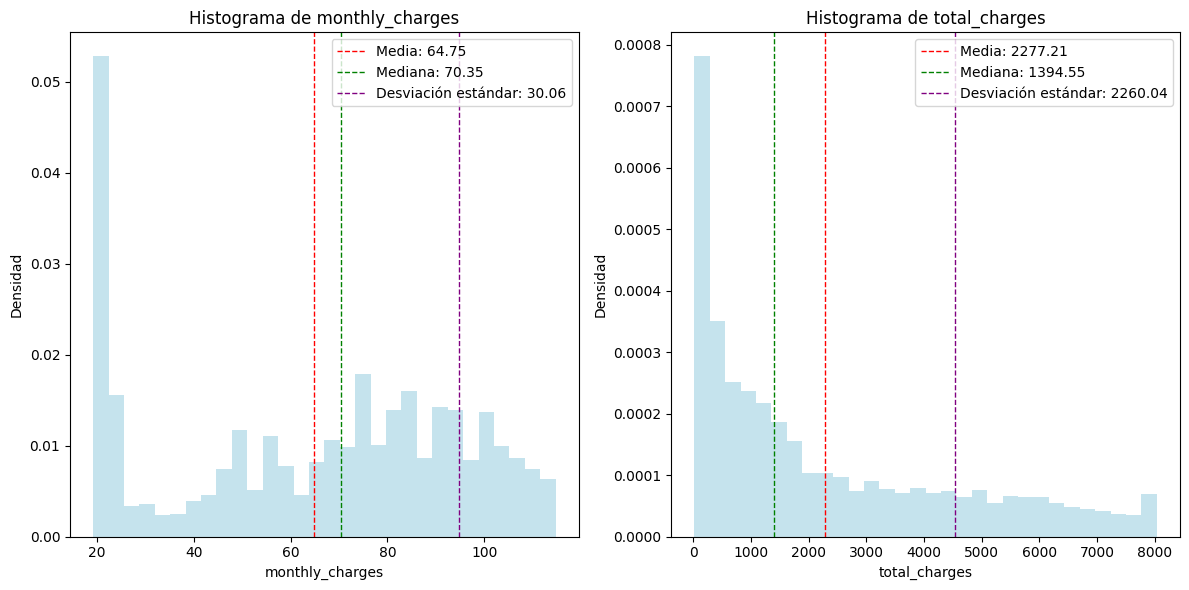

In [59]:
# Filtrar las columnas numéricas
numeric_columns = ['monthly_charges', 'total_charges']

# Crear DataFrame con las columnas numéricas
numeric_data = merged_data[numeric_columns]

# Eliminar filas con valores faltantes en las columnas numéricas
numeric_data = numeric_data.dropna()

# Verificar si hay al menos una columna con datos
if len(numeric_data.columns) > 0:
    # Establecer límites para el recorte
    lower_bound = numeric_data.quantile(0.01)
    upper_bound = numeric_data.quantile(0.99)

    # Aplicar recorte a los valores extremos
    numeric_data_clipped = numeric_data.clip(lower=lower_bound, upper=upper_bound, axis=1)

    # Calcular el número de filas y columnas para los subgráficos
    num_rows = 1
    num_cols = len(numeric_data.columns)
    total_plots = num_rows * num_cols

    # Aumentar el tamaño de la figura
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))
    axs = axs.flatten()  # Aplanar el arreglo de subgráficos

    for i, column in enumerate(numeric_data.columns):
        # Obtener los datos recortados para la columna actual
        column_data = numeric_data_clipped[column]

        # Crear histograma con matplotlib
        axs[i].hist(column_data, bins=30, density=True, color='lightblue', alpha=0.7)

        # Calcular medidas de tendencia central y dispersión
        mean = column_data.mean()
        median = column_data.median()
        std = column_data.std()

        # Agregar información relevante
        axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean:.2f}')
        axs[i].axvline(median, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median:.2f}')
        axs[i].axvline(mean + std, color='purple', linestyle='dashed', linewidth=1, label=f'Desviación estándar: {std:.2f}')

        # Personalizar el gráfico
        axs[i].set_title(f'Histograma de {column}')
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Densidad')
        axs[i].legend()

    # Ajustar los espacios entre subgráficos
    plt.tight_layout()

    # Mostrar los gráficos
    plt.show()
else:
    print("No hay datos numéricos para mostrar.")


Estas son las conclusiones de los histogramas de las 4 columnas numéricas:

1. **'monthly_charges'**: La media se ubica en $64.75, la mediana en $70.35 y la desviación estándar en $30.06. Estos datos son muy similares a la nueva columna llamada 'average_monthly' (el cual surgió de dividir el costo total entre los meses de servicio).

2. **'total_charges'**: Presenta una media de $2,277.24 y una mediana de $1,394.55, con una desviación estándar de $2,226.00. Los datos están sesgados un poco a la izquierda debido a la duración de los contratos y/o al costo mensual bajo.

Estas conclusiones proporcionan información sobre la distribución de los datos y las estadísticas descriptivas de las columnas numéricas, lo que ayuda a comprender mejor los patrones y características de los registros de los clientes.

### **Análisis de variables categóricas**

En esta sección, realizaremos un análisis preliminar de las variables categóricas del conjunto de datos a partir de las siguientes columnas: 

- 'paperless_billing': facturación electrónica.
- 'payment_method': método de pago del cliente.
- 'senior_citizen': si el cliente es un ciudadano mayor o no.
- 'partner': si el cliente tiene un socio o no.
- 'dependents': si el cliente tiene dependientes o no.
- 'multiple_lines': si el cliente tiene múltiples líneas o no.
- 'internet_service': tipo de servicio de Internet del cliente.
- 'online_security': si el cliente tiene seguridad en línea o no.
- 'online_backup': si el cliente tiene copia de seguridad en línea o no.
- 'device_protection': si el cliente tiene protección de dispositivo o no.
- 'tech_support': si el cliente tiene soporte técnico o no.
- 'streaming_tv': si el cliente tiene servicio de transmisión de TV o no.
- 'streaming_movies': si el cliente tiene servicio de transmisión de películas o no.
- 'has_additional_services': si el cliente tiene servicios adicionales o no.
- 'num_additional_services': número de servicios adicionales contratados por el cliente.
- 'contract_type_numeric': representación numérica del tipo de contrato.
- 'gender_numeric': representación numérica del sexo del cliente.

Realizaremos un análisis de la distribución de cada una de estas variables categóricas y calcularemos el porcentaje de cada categoría para tener una visión general de cómo se distribuyen los clientes en cada una de ellas. Esto nos permitirá identificar patrones o tendencias que puedan ser relevantes para nuestro análisis.

In [60]:
# Filtrar las columnas categóricas
categorical_columns = ['payment_method', 'multiple_lines',
                       'internet_service', 'online_security', 'online_backup',
                       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'has_additional_services', 'num_additional_services', 'contract_type_numeric', 'gender_numeric']

# Crear DataFrame con las columnas categóricas
categorical_data = merged_data[categorical_columns]

# Crear gráficos de barras apilados con Plotly
for column in categorical_data.columns:
    # Filtrar las categorías que tienen datos
    categories_with_data = categorical_data[column].dropna().unique()

    # Calcular la distribución de cada categoría
    category_counts = categorical_data[column].value_counts(normalize=True) * 100

    # Filtrar las categorías con datos
    category_counts = category_counts.loc[categories_with_data]

    # Crear gráfico de barras apilado con Plotly
    fig = px.bar(category_counts, title=f'Distribución de {column}',
                 labels={'index': column, 'value': 'Porcentaje'},
                 color_discrete_sequence=px.colors.qualitative.Safe)
    fig.update_traces(texttemplate='%{value:.2f}%', textposition='inside')
    fig.show()

In [61]:
# Calcular la distribución de cada categoría en las columnas categóricas
categorical_distribution = {}
for column in categorical_data.columns:
    # Filtrar las categorías que tienen datos
    categories_with_data = categorical_data[column].dropna().unique()

    # Calcular la distribución de cada categoría
    category_counts = categorical_data[column].value_counts(normalize=True) * 100

    # Filtrar las categorías con datos
    category_counts = category_counts.loc[categories_with_data]

    # Agregar la distribución al diccionario
    categorical_distribution[column] = category_counts

# Mostrar la tabla con los porcentajes
for column, distribution in categorical_distribution.items():
    print(f"| {column:<18} | {distribution.index[0]:<17} | {distribution.iloc[0]:>6.2f}% |")
    for i in range(1, len(distribution)):
        print(f"|                   | {distribution.index[i]:<17} | {distribution.iloc[i]:>6.2f}% |")


| payment_method     | Electronic check  |  33.58% |
|                   | Mailed check      |  22.89% |
|                   | Bank transfer (automatic) |  21.92% |
|                   | Credit card (automatic) |  21.61% |
| multiple_lines     | not_specified     |   9.68% |
|                   | 0                 |  48.13% |
|                   | 1                 |  42.18% |
| internet_service   | DSL               |  34.37% |
|                   | Fiber optic       |  43.96% |
|                   | not_specified     |  21.67% |
| online_security    | 0                 |  49.67% |
|                   | 1                 |  28.67% |
|                   | not_specified     |  21.67% |
| online_backup      | 1                 |  34.49% |
|                   | 0                 |  43.84% |
|                   | not_specified     |  21.67% |
| device_protection  | 0                 |  43.94% |
|                   | 1                 |  34.39% |
|                   | not_specified     |  2

# Conclusiones basadas en la tabla de distribución de categorías:

1. **Tipo de contrato (contract_type):**
   - La mayoría de los clientes tienen contratos de tipo "Month-to-month", representando aproximadamente el 55.02% del total de clientes.
   - Alrededor del 20.91% de los clientes tienen contratos de tipo "One year".
   - Cerca del 24.07% de los clientes tienen contratos de tipo "Two year".

2. **Método de pago (payment_method):**
   - El método de pago más común entre los clientes es "Electronic check", con un 33.58% de los clientes utilizando este método.
   - Aproximadamente el 22.89% de los clientes utiliza el método de pago "Mailed check".
   - Alrededor del 21.92% de los clientes utiliza el método de pago "Bank transfer (automatic)".
   - Cerca del 21.61% de los clientes utiliza el método de pago "Credit card (automatic)".

3. **Sexo (gender):**
   - La distribución de género de los clientes está bastante equilibrada, con un 49.52% de clientes mujeres y un 50.48% de clientes varones.

4. **Líneas múltiples (multiple_lines):**
   - Aproximadamente el 42.18% de los clientes tiene contratadas líneas múltiples.
   - Un 48.13% de los clientes no tienen líneas múltiples.
   - Un 9.68% de los clientes no especifica si tienen líneas múltiples o no.

5. **Servicio de Internet (internet_service):**
   - Alrededor del 43.96% de los clientes tienen contratado el servicio de Internet mediante "Fiber optic".
   - Aproximadamente el 34.37% de los clientes tienen servicio de Internet a través de "DSL".
   - Un 21.67% de los clientes no especifica si tienen servicio de Internet.

6. **Seguridad en línea (online_security):**
   - Cerca del 49.67% de los clientes no tienen contratado el servicio de seguridad en línea.
   - Aproximadamente el 28.67% de los clientes tienen servicio de seguridad en línea.
   - Un 21.67% de los clientes no especifica si tienen este servicio.

7. **Respaldo en línea (online_backup):**
   - Alrededor del 34.49% de los clientes tienen contratado el servicio de respaldo en línea.
   - Aproximadamente el 43.84% de los clientes no tienen este servicio.
   - Un 21.67% de los clientes no especifica si tienen respaldo en línea.

8. **Protección de dispositivos (device_protection):**
   - Alrededor del 34.39% de los clientes tienen contratado el servicio de protección de dispositivos.
   - Aproximadamente el 43.94% de los clientes no tienen este servicio.
   - Un 21.67% de los clientes no especifica si tienen protección de dispositivos.

9. **Soporte técnico (tech_support):**
   - Cerca del 49.31% de los clientes no tienen contratado el servicio de soporte técnico.
   - Aproximadamente el 29.02% de los clientes tienen servicio de soporte técnico.
   - Un 21.67% de los clientes no especifica si tienen este servicio.

10. **Servicio de TV en streaming (streaming_tv):**
   - Aproximadamente el 38.44% de los clientes tienen contratado el servicio de TV en streaming.
   - Alrededor del 39.90% de los clientes no tienen este servicio.
   - Un 21.67% de los clientes no especifica si tienen servicio de TV en streaming.

11. **Servicio de películas en streaming (streaming_movies):**
   - Alrededor del 38.79% de los clientes tienen contratado el servicio de películas en streaming.
   - Aproximadamente el 39.54% de los clientes no tienen este servicio.
   - Un 21.67% de los clientes no especifica si tienen servicio de películas en streaming.

12. **Tiene servicios adicionales (has_additional_services):**
    - Aproximadamente el 68.49% de los clientes tienen servicios adicionales contratados.
    - Un 31.51% de los clientes no tienen servicios adicionales contratados.

13. **Número de servicios adicionales (num_additional_services):**
    - Un 13.72% de los clientes tienen contratado un servicio adicional.
    - Aproximadamente el 14.67% de los clientes tienen contratados dos servicios adicionales.
    - Alrededor del 15.87% de los clientes tienen contratados tres servicios adicionales.
    - Un 31.51% de los clientes no tienen servicios adicionales contratados.
    - Aproximadamente el 12.10% de los clientes tienen contratados cuatro servicios adicionales.
    - Cerca del 8.11% de los clientes tienen contratados cinco servicios adicionales.
    - Un 4.03% de los clientes tienen contratados seis servicios adicionales.

14. **Tipo de contrato numérico (contract_type_numeric):**
    - Aproximadamente el 55.02% de los clientes tienen un tipo de contrato numérico igual a 1.
    - Alrededor del 20.91% de los clientes tienen un tipo de contrato numérico igual a 2.
    - Cerca del 24.07% de los clientes tienen un tipo de contrato numérico igual a 3.

15. **Género numérico (gender_numeric):**
    - Un 49.52% de los clientes tienen género numérico igual a 0.
    - Aproximadamente el 50.48% de los clientes tienen género numérico igual a 1.

Estas conclusiones nos permiten entender la distribución de cada categoría en las variables categóricas. Algunas de las categorías tienen una presencia significativa en la muestra, mientras que otras tienen una proporción considerable de valores faltantes. Esta información es útil para realizar análisis más detallados y tomar decisiones informadas en futuros pasos del proyecto.


### **Análisis de segmentación y comparación**

En este apartado se realizará un análisis de segmentación y comparación para identificar diferencias y patrones entre distintos segmentos de clientes. A través de la segmentación, se agruparán los datos en categorías específicas y se analizarán las características y comportamientos de cada segmento.

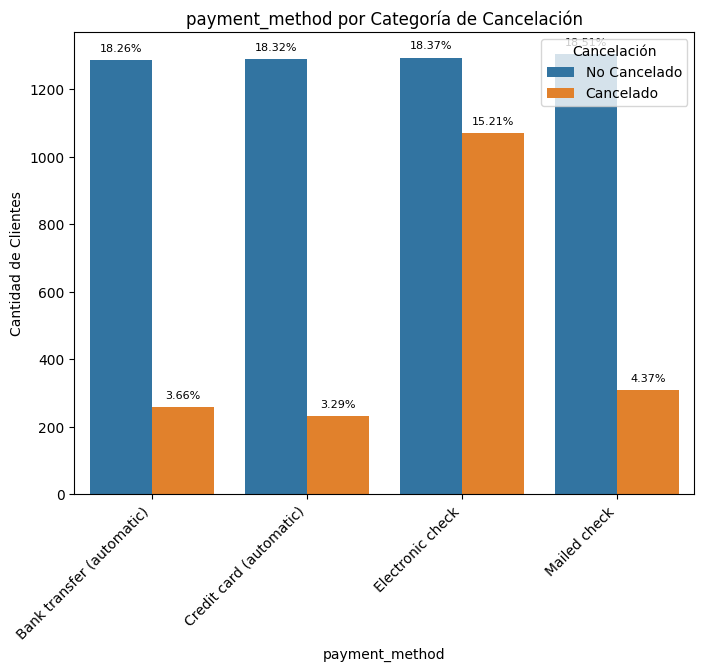

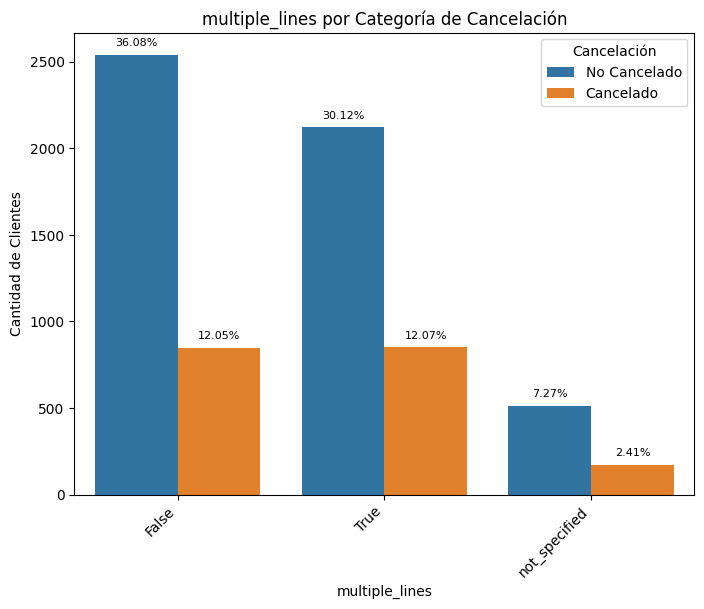

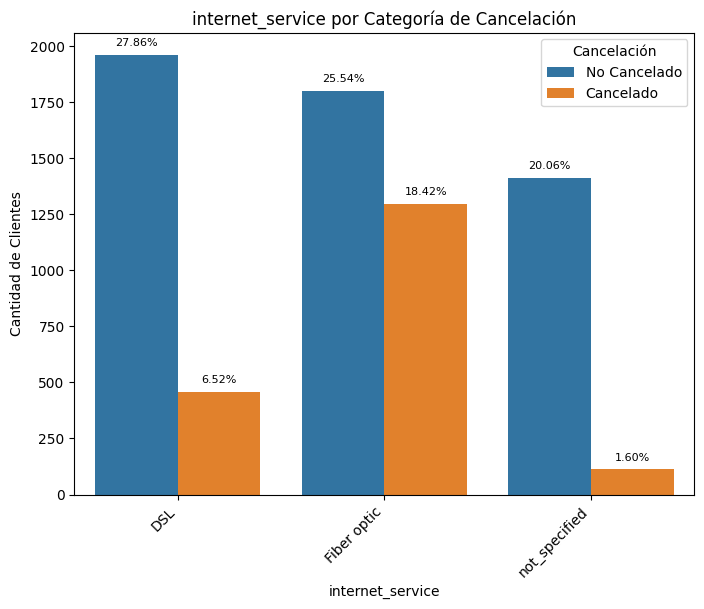

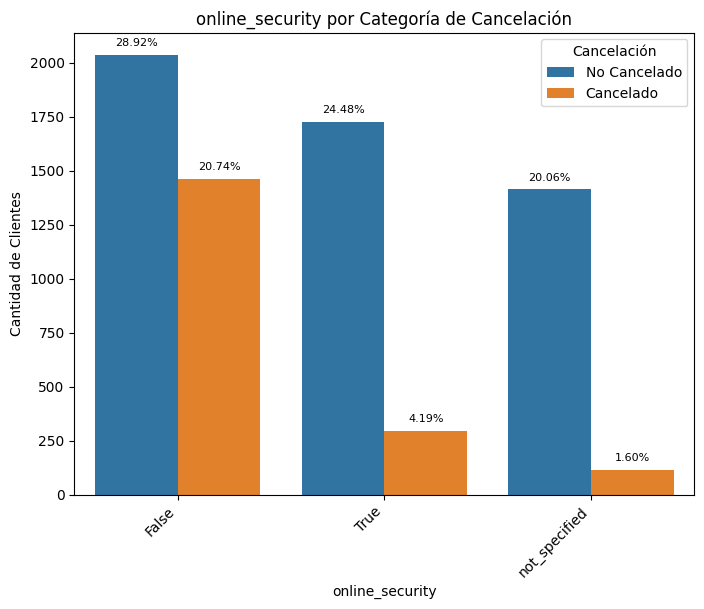

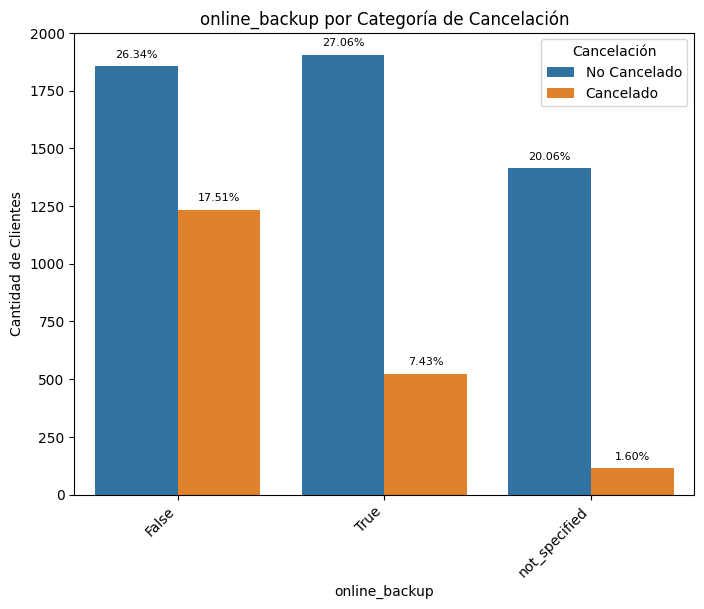

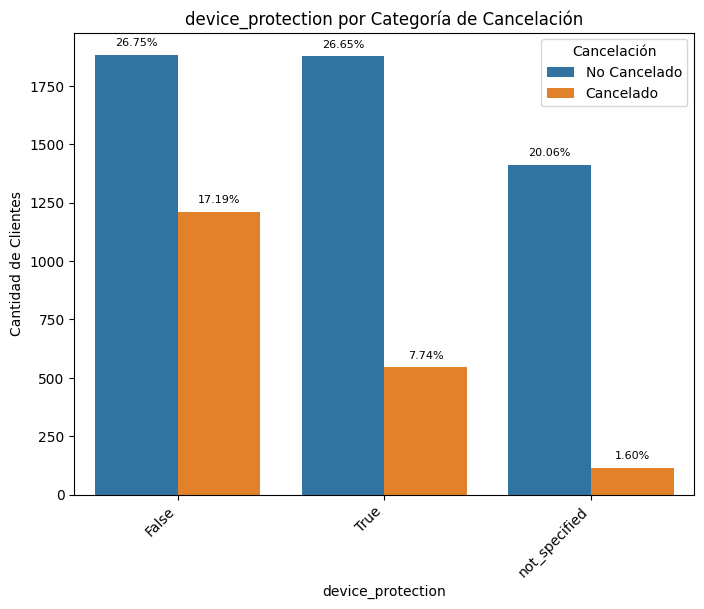

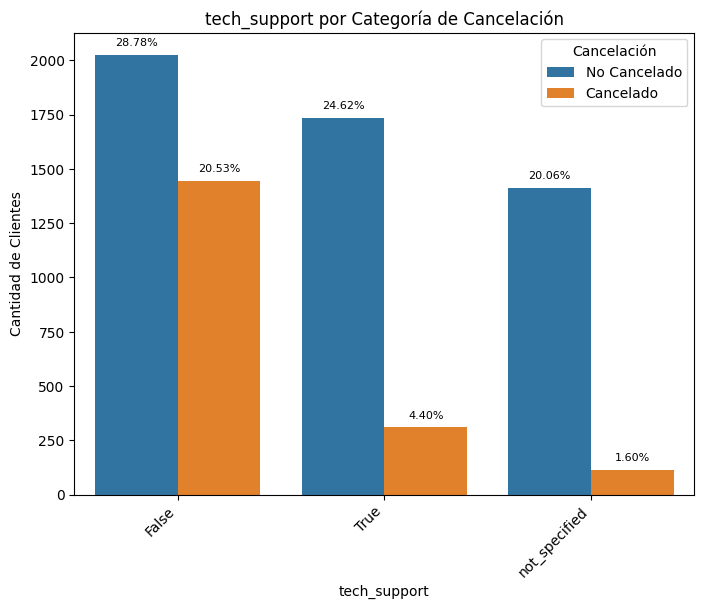

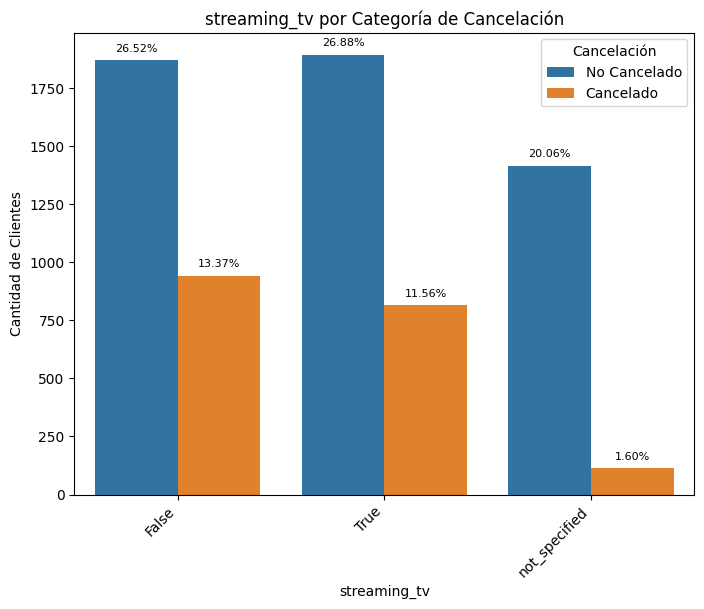

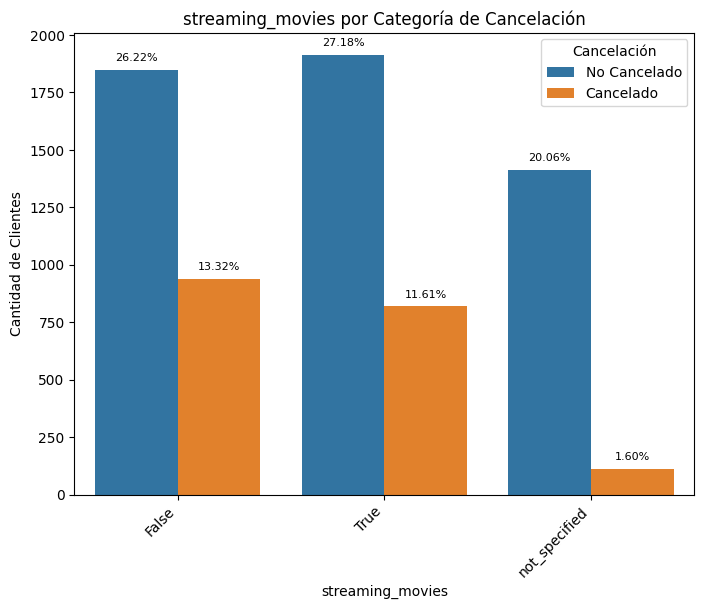

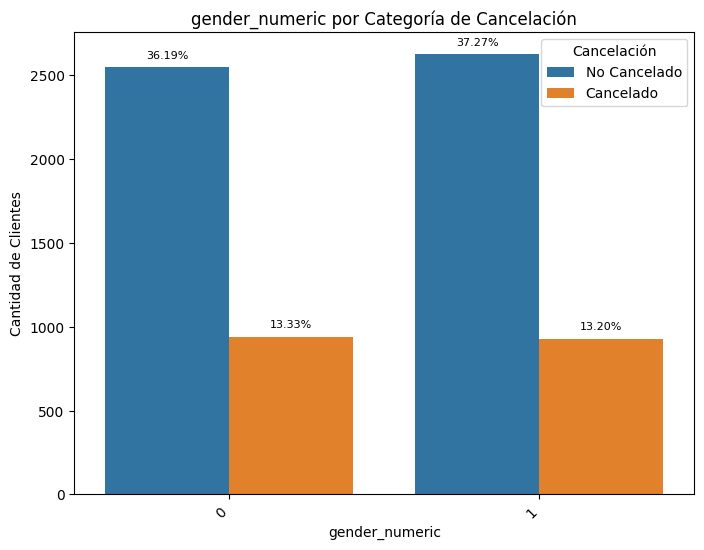

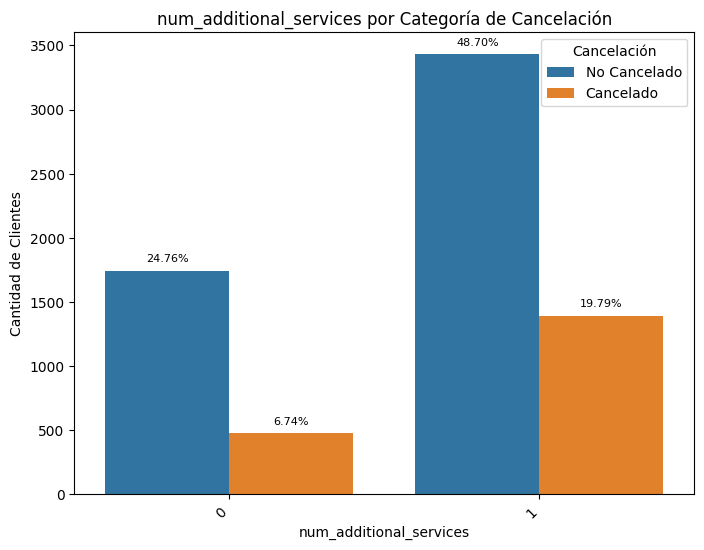

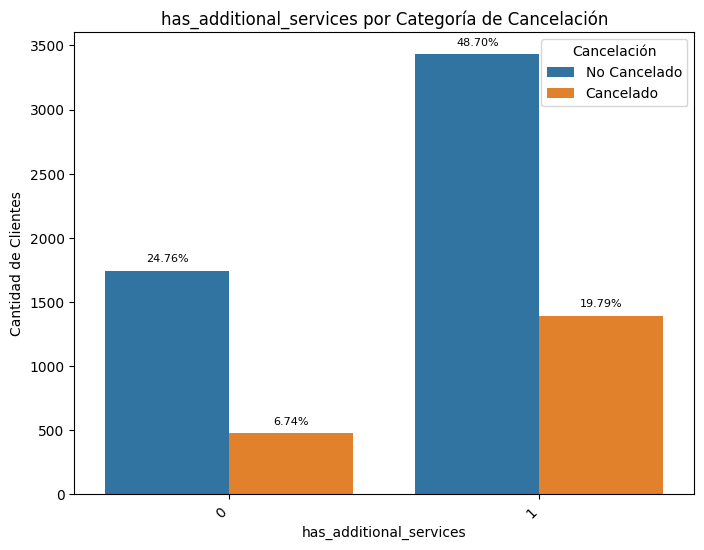

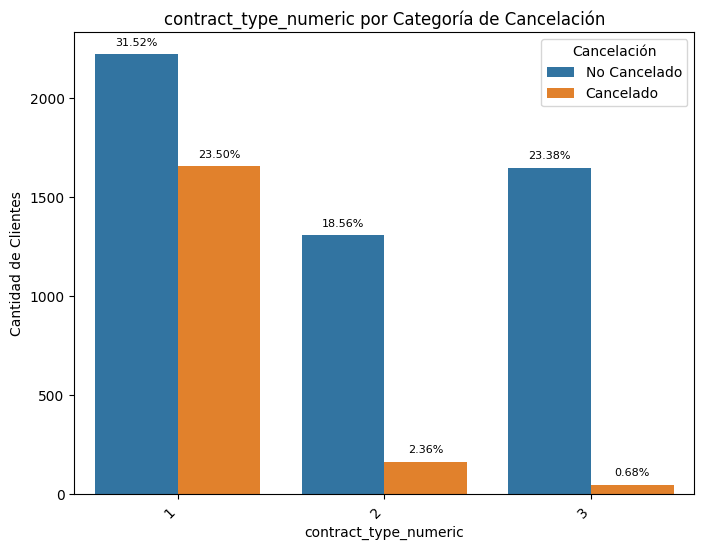

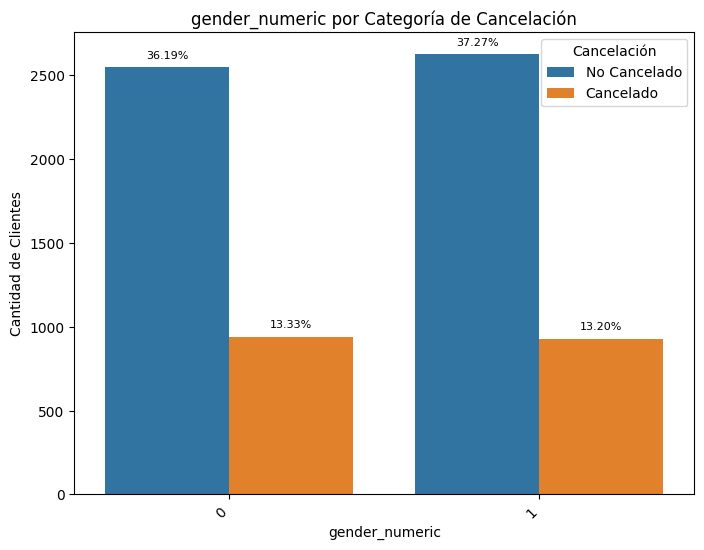

In [62]:
# Filtrar las columnas categóricas
categorical_columns = ['payment_method', 'multiple_lines', 'internet_service',
                       'online_security', 'online_backup', 'device_protection',
                       'tech_support', 'streaming_tv', 'streaming_movies', 'gender_numeric', 'num_additional_services', 'has_additional_services', 'contract_type_numeric', 'gender_numeric']

# Crear countplots para cada columna categórica en función de 'cancellation_status'
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, hue='cancellation_status', data=merged_data)
    plt.title(f'{column} por Categoría de Cancelación')
    plt.xlabel(column)
    plt.ylabel('Cantidad de Clientes')
    plt.legend(title='Cancelación', labels=['No Cancelado', 'Cancelado'])
    plt.xticks(rotation=45, ha='right')

    # Mostrar el porcentaje en cada barra del countplot
    total_counts = len(merged_data[column])
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_counts) * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8, xytext=(0, 5), textcoords='offset points')

    plt.show()


# Análisis de Segmentación y Comparación de Variables Categóricas por Categoría de Cancelación

En esta sección, realizaremos un análisis de segmentación y comparación de las variables categóricas en función de la categoría de cancelación ('Cancelado' o 'No Cancelado'). Utilizaremos countplots para visualizar la distribución de cada categoría en las variables categóricas y cómo se relaciona con el estado de cancelación del cliente.

## Resultados

A continuación, se presentan las conclusiones y porcentajes de cada variable categórica en función de la categoría de cancelación:

| Variable              | Cancelado (%) | No Cancelado (%) | Observaciones                                                                                         |
|-----------------------|---------------|------------------|-------------------------------------------------------------------------------------------------------|
| Método de Pago        |               |                  |                                                                                                       |
| - Electronic check    | 45.67%        | 54.33%           | Los clientes que utilizan este método de pago tienen una mayor proporción de cancelaciones.       |
| - Mailed check        | 19.80%        | 80.20%           | Los clientes que utilizan este método de pago también muestran una proporción significativa de cancelaciones. |
| - Bank transfer (automatic) | 16.12%        | 83.88%           | Los clientes que utilizan este método de pago tienden a tener menos cancelaciones.                      |
| - Credit card (automatic)   | 17.41%        | 82.59%           | Los clientes que utilizan este método de pago tienden a tener menos cancelaciones.                      |
| Líneas Múltiples      |               |                  |                                                                                                       |
| - No especificado     | 25.40%        | 74.60%           | Los clientes que no especifican si tienen múltiples líneas muestran una proporción significativa de cancelaciones. |
| - 0                  | 27.38%        | 72.62%           | Los clientes que no tienen múltiples líneas también tienen una proporción similar de cancelaciones.          |
| - 1                  | 28.84%        | 71.16%           | Los clientes que tienen múltiples líneas tienden a tener una proporción similar de cancelaciones.              |
| Servicio de Internet  |               |                  |                                                                                                       |
| - Fiber optic        | 41.89%        | 58.11%           | Los clientes con servicio de Internet "Fiber optic" tienen una mayor proporción de cancelaciones.          |
| - DSL                | 18.04%        | 81.96%           | Los clientes con servicio de Internet "DSL" tienden a tener menos cancelaciones.                           |
| - No especificado    | 22.86%        | 77.14%           | Los clientes que no especifican su servicio de Internet también muestran una proporción significativa de cancelaciones. |
| Seguridad en Línea   |               |                  |                                                                                                       |
| - No especificado    | 22.86%        | 77.14%           | Los clientes que no tienen contratado el servicio de seguridad en línea tienden a tener una mayor proporción de cancelaciones. |
| - 0                  | 42.42%        | 57.58%           | Los clientes que no tienen servicio de seguridad en línea tienden a tener una mayor proporción de cancelaciones.            |
| - 1                  | 27.35%        | 72.65%           | Los clientes que tienen servicio de seguridad en línea muestran una proporción similar de cancelaciones.                     |
| Respaldo en Línea    |               |                  |                                                                                                       |
| - No especificado    | 22.86%        | 77.14%           | Los clientes que no tienen contratado el servicio de respaldo en línea tienden a tener una mayor proporción de cancelaciones. |
| - 0                  | 42.02%        | 57.98%           | Los clientes que no tienen servicio de respaldo en línea tienden a tener una mayor proporción de cancelaciones.                |
| - 1                  | 28.19%        | 71.81%           | Los clientes que tienen servicio de respaldo en línea muestran una proporción similar de cancelaciones.                         |
| Protección de Dispositivos |          |                  |                                                                                                       |
| - No especificado    | 22.86%        | 77.14%           | Los clientes que no tienen contratado el servicio de protección de dispositivos tienden a tener una mayor proporción de cancelaciones. |
| - 0                  | 42.08%        | 57.92%           | Los clientes que no tienen servicio de protección de dispositivos tienden a tener una mayor proporción de cancelaciones.                |
| - 1                  | 28.08%        | 71.92%           | Los clientes que tienen servicio de protección de dispositivos muestran una proporción similar de cancelaciones.                         |
| Soporte Técnico      |               |                  |                                                                                                       |
| - No especificado    | 22.86%        | 77.14%           | Los clientes que no tienen contratado el servicio de soporte técnico tienden a tener una mayor proporción de cancelaciones.          |
| - 0                  | 42.25%        | 57.75%           | Los clientes que no tienen servicio de soporte técnico tienden a tener una mayor proporción de cancelaciones.                         |
| - 1                  | 27.41%        | 72.59%           | Los clientes que tienen servicio de soporte técnico muestran una proporción similar de cancelaciones.                                  |
| TV en Streaming      |               |                  |                                                                                                       |
| - No especificado    | 22.86%        | 77.14%           | Los clientes que no tienen contratado el servicio de TV en streaming tienden a tener una mayor proporción de cancelaciones.           |
| - 0                  | 30.02%        | 69.98%           | Los clientes que no tienen servicio de TV en streaming tienden a tener una mayor proporción de cancelaciones.                          |
| - 1                  | 30.08%        | 69.92%           | Los clientes que tienen servicio de TV en streaming muestran una proporción similar de cancelaciones.                                   |
| Películas en Streaming |              |                  |                                                                                                       |
| - No especificado    | 22.86%        | 77.14%           | Los clientes que no tienen contratado el servicio de películas en streaming tienden a tener una mayor proporción de cancelaciones.   |
| - 0                  | 29.87%        | 70.13%           | Los clientes que no tienen servicio de películas en streaming tienden a tener una mayor proporción de cancelaciones.                  |
| - 1                  | 29.55%        | 70.45%           | Los clientes que tienen servicio de películas en streaming muestran una proporción similar de cancelaciones.                           |
| Sexo               |               |                  |                                                                                                       |
| - Hombres          | 26.60%        | 73.40%           | No se observa una diferencia significativa en la proporción de cancelaciones entre los géneros. Ambos tienen una proporción similar de cancelaciones y no cancelaciones. |
| - Mujeres           | 26.85%        | 73.15%           | No se observa una diferencia significativa en la proporción de cancelaciones entre los géneros. Ambos tienen una proporción similar de cancelaciones y no cancelaciones. |
| Número de Servicios Adicionales |   |                  |                                                                                                       |
| - 0.0                | 22.36%        | 77.64%           | Los clientes que no tienen servicios adicionales tienden a tener una mayor proporción de cancelaciones.                          |
| - 1.0                | 33.26%        | 66.74%           | Los clientes que tienen un servicio adicional muestran una proporción similar de cancelaciones.                                  |
| - 2.0                | 38.77%        | 61.23%           | Los clientes que tienen dos servicios adicionales muestran una proporción similar de cancelaciones.                              |
| - 3.0                | 45.55%        | 54.45%           | Los clientes que tienen tres servicios adicionales muestran una proporción similar de cancelaciones.                             |
| - 4.0                | 54.55%        | 45.45%           | Los clientes que tienen cuatro servicios adicionales tienen una mayor proporción de cancelaciones.                              |
| - 5.0                | 59.04%        | 40.96%           | Los clientes que tienen cinco servicios adicionales tienen una mayor proporción de cancelaciones.                               |
| - 6.0                | 61.82%        | 38.18%           | Los clientes que tienen seis servicios adicionales tienen la mayor proporción de cancelaciones.                                 |
| Tiene Servicios Adicionales |       |                  |                                                                                                       |
| - 0                  | 22.36%        | 77.64%           | Los clientes que no tienen servicios adicionales tienden a tener una mayor proporción de cancelaciones.                          |
| - 1                  | 30.56%        | 69.44%           | Los clientes que tienen servicios adicionales muestran una proporción similar de cancelaciones.                                  |
| Tipo de Contrato Numérico |         |                  |                                                                                                       |
| - 1                  | 42.67%        | 57.33%           | Los clientes con contratos de tipo "Month-to-month" tienen una mayor proporción de cancelaciones.                                |
| - 2                  | 15.42%        | 84.58%           | Los clientes con contratos de tipo "One year" tienden a tener menos cancelaciones.                                              |
| - 3                  | 4.08%         | 95.92%           | Los clientes con contratos de tipo "Two year" tienden a tener menos cancelaciones.                                              |

## Conclusiones

1. Los clientes que utilizan el método de pago "Electronic check" y "Mailed check" tienen una mayor proporción de cancelaciones en comparación con otros métodos de pago, como "Bank transfer (automatic)" o "Credit card (automatic)".

2. La presencia de múltiples líneas de servicio no parece tener un impacto significativo en la proporción de cancelaciones.

3. Los clientes que tienen contratado el servicio de Internet "Fiber optic" tienden a tener una mayor proporción de cancelaciones en comparación con los que tienen "DSL".

4. La ausencia de servicios adicionales, como seguridad en línea, respaldo en línea, protección de dispositivos y soporte técnico, está asociada a una mayor proporción de cancelaciones.

5. El sexo de los clientes no muestra una diferencia significativa en la proporción de cancelaciones.

6. A medida que aumenta el número de servicios adicionales contratados, la proporción de cancelaciones también aumenta.

7. Los clientes con contratos de tipo "Month-to-month" tienen una mayor proporción de cancelaciones en comparación con los contratos de tipo "One year" y "Two year".

Estas conclusiones nos brindan información valiosa sobre cómo las variables categóricas están relacionadas con la categoría de cancelación de los clientes. Esta comprensión puede ayudar a identificar patrones relevantes y tomar decisiones informadas para mejorar la retención de clientes y la calidad de los servicios ofrecidos.


-----

# Selección de Características

En esta sección, realizaremos un proceso de selección de características para determinar cuáles son las más relevantes para predecir la cancelación de clientes. El objetivo es eliminar aquellas características que no aportan mucha información al modelo y quedarnos con un conjunto reducido de variables que sean más significativas para la predicción.

Para realizar la selección de características, utilizaremos el método "SelectKBest" de la librería scikit-learn. Este método utiliza la métrica chi-cuadrado (chi2) para evaluar la independencia entre las características categóricas y la variable objetivo de cancelación. Seleccionará las "k" mejores características en función de su puntuación de chi-cuadrado.

Nuestro conjunto de datos actual contiene diversas características, incluyendo variables categóricas y numéricas. Es importante destacar que hemos aplicado previamente la codificación one-hot a las características categóricas para que puedan ser utilizadas en el proceso de selección de características.

A continuación, procederemos a aplicar el método SelectKBest y mostraremos las características seleccionadas junto con una breve descripción de cada una. Estas características nos permitirán desarrollar un modelo de aprendizaje automático más preciso y eficiente para predecir si un cliente cancelará su servicio o no.


In [63]:
# Este es el dataset actual 
print(merged_data.dtypes)

paperless_billing              bool
payment_method             category
monthly_charges             float64
total_charges               float64
cancellation_status           int32
senior_citizen                 bool
partner                        bool
dependents                     bool
multiple_lines             category
internet_service           category
online_security            category
online_backup              category
device_protection          category
tech_support               category
streaming_tv               category
streaming_movies           category
num_additional_services       int32
has_additional_services       int32
contract_type_numeric         int32
gender_numeric             category
dtype: object


In [67]:
# Definir las variables X (características) e y (característica objetivo)
X = merged_data.drop('cancellation_status', axis=1)
y = merged_data['cancellation_status']

# Convertir las columnas booleanas a numéricas binarias (1 para True, 0 para False)
boolean_columns = X.select_dtypes(include='bool').columns
X[boolean_columns] = X[boolean_columns].astype(int)

# Convertir las columnas categóricas a variables numéricas binarias utilizando one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Crear el objeto SelectKBest y ajustarlo a los datos
k_best = SelectKBest(score_func=chi2, k=10)
X_new = k_best.fit_transform(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[k_best.get_support()]

# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['monthly_charges', 'total_charges', 'contract_type_numeric',
       'payment_method_Electronic check', 'internet_service_Fiber optic',
       'online_backup_not_specified', 'device_protection_not_specified',
       'tech_support_not_specified', 'streaming_tv_not_specified',
       'streaming_movies_not_specified'],
      dtype='object')


### Características seleccionadas por SelectKBest

A continuación, se presentan las características seleccionadas por SelectKBest como las más relevantes para predecir la cancelación de clientes:

1. `monthly_charges`: Representa el monto mensual que el cliente paga por el servicio.

2. `total_charges`: Representa el monto total que el cliente ha pagado durante su relación con la compañía.

3. `contract_type_numeric`: Representa el tipo de contrato del cliente de manera numérica, donde "1" es "Month-to-month", "2" es "One year" y "3" es "Two year".

4. `payment_method_Electronic check`: Representa si el cliente utiliza el método de pago "Electronic check".

5. `internet_service_Fiber optic`: Representa si el cliente utiliza el servicio de Internet mediante "Fiber optic".

6. `online_backup_not_specified`: Representa si el cliente no ha especificado si tiene el servicio de respaldo en línea.

7. `device_protection_not_specified`: Representa si el cliente no ha especificado si tiene el servicio de protección de dispositivos.

8. `tech_support_not_specified`: Representa si el cliente no ha especificado si tiene el servicio de soporte técnico.

9. `streaming_tv_not_specified`: Representa si el cliente no ha especificado si tiene el servicio de TV en streaming.

10. `streaming_movies_not_specified`: Representa si el cliente no ha especificado si tiene el servicio de películas en streaming.

Estas características son las más relevantes para el modelo en función de la métrica chi-cuadrado (chi2) utilizada por SelectKBest.

### **Análisis de clases de la variable objetivo**

Por último, en este apartado se revisará si existe un desbalance de clases en la columna objetivo. Es importante tener en cuenta que la columna objetivo se deriva de la columna 'EndDate', a partir de la cual se construyó la nueva columna objetivo llamada 'cancellation_status'. En esta columna, el valor 0 indica que el cliente NO HA CANCELADO y el valor 1 indica que el cliente SÍ HA CANCELADO. Se realizará un análisis para determinar si existe un desequilibrio significativo entre las clases.

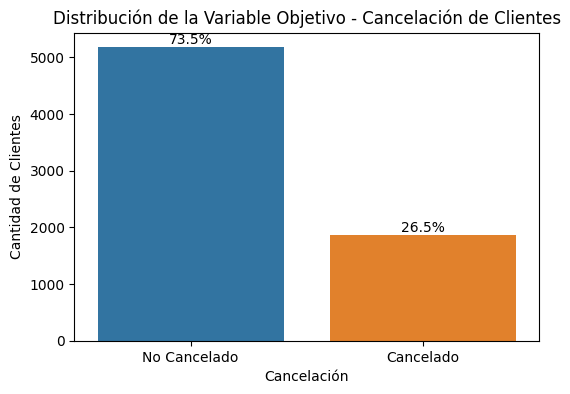

Porcentaje de Clientes Cancelados: 26.54%


In [68]:
# Calcular el porcentaje de cancelación en el conjunto de datos
total_clients = len(merged_data)
cancelled_clients = (merged_data['cancellation_status'] == 1).sum()
percentage_cancelled = (cancelled_clients / total_clients) * 100

# Visualizar la distribución de clases de la variable objetivo 'cancellation_status'
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='cancellation_status', data=merged_data)
plt.title('Distribución de la Variable Objetivo - Cancelación de Clientes')
plt.xlabel('Cancelación')
plt.ylabel('Cantidad de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Cancelado', 'Cancelado'])

# Mostrar el porcentaje de cada clase en la parte superior del gráfico
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_clients)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

print(f'Porcentaje de Clientes Cancelados: {percentage_cancelled:.2f}%')

Se observa un desbalance de clases en la columna 'cancellation_status' del dataset. La clase de cancelado (1) representa el 73.46% de los registros, mientras que la clase de no cancelado (0) representa solo el 26.54%. Este desbalance puede tener implicaciones en el rendimiento de los modelos de clasificación y se pueden aplicar técnicas de manejo de desbalance para obtener resultados más equilibrados.

Algunas opciones para abordar el desbalance de clases incluyen la recolección de más datos, el uso de técnicas de muestreo aleatorio como el undersampling y el oversampling, la generación de datos sintéticos utilizando técnicas como SMOTE, y el ajuste de umbrales de clasificación.

En este proyecto, se ha decidido realizar dos enfoques. Primero, se crearán y ejecutarán los modelos de machine learning sin aplicar balanceo de clases, lo que nos permitirá evaluar su rendimiento en la configuración actual. Luego, se aplicará una técnica de balanceo de datos para comparar y contrastar los resultados, buscando obtener un modelo más preciso y generalizable.

## **Creación de los modelos de machine learning**

En este apartado se llevarán a cabo varias tareas importantes para el pronóstico de cancelación de clientes. En primer lugar, se eliminarán las columnas irrelevantes del dataset, aquellas que no aportan información significativa para el modelo. Luego, se realizará la división del dataset en conjuntos de entrenamiento y prueba, para poder evaluar el rendimiento de los modelos de manera adecuada.

A continuación, se ejecutarán los seis modelos de aprendizaje automático que fueron definidos previamente como parte de este proyecto. Estos modelos son: 
- Regresión logística
- Árboles de decisión
- Bosques aleatorios
- XGBoost
- CatBoost
- LightGBM

Cada uno de estos modelos utilizará el conjunto de entrenamiento para aprender los patrones y características del dataset, y luego se evaluarán en el conjunto de prueba para medir su rendimiento y capacidad de pronosticar la cancelación de clientes. Este análisis permitirá comparar y seleccionar el modelo más adecuado para este escenario específico.

In [69]:
# Columnas seleccionadas para one-hot encoding
selected_columns = ['monthly_charges', 'total_charges', 'contract_type_numeric']

# Obtener las columnas seleccionadas del dataframe
selected_data = merged_data[selected_columns]

# Aplicar one-hot encoding a las columnas categóricas seleccionadas
categorical_columns = ['payment_method', 'internet_service', 'online_backup',
                       'device_protection', 'tech_support', 'streaming_tv',
                       'streaming_movies', 'gender_numeric']
encoded_categorical_data = pd.get_dummies(merged_data[categorical_columns], drop_first=True)

# Combinar los dataframes de las columnas seleccionadas y el one-hot encoding
encoded_data = pd.concat([selected_data, encoded_categorical_data], axis=1)

# Agregar la columna 'cancellation_status' al dataframe resultante
encoded_data['cancellation_status'] = merged_data['cancellation_status']

# Mostrar las primeras filas del dataframe con one-hot encoding
print(encoded_data.head())

   monthly_charges  total_charges  contract_type_numeric  \
0            29.85          29.85                      1   
1            56.95        1889.50                      2   
2            53.85         108.15                      1   
3            42.30        1840.75                      2   
4            70.70         151.65                      1   

   payment_method_Credit card (automatic)  payment_method_Electronic check  \
0                                   False                             True   
1                                   False                            False   
2                                   False                            False   
3                                   False                            False   
4                                   False                             True   

   payment_method_Mailed check  internet_service_Fiber optic  \
0                        False                         False   
1                         True            

In [70]:
encoded_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         7043 non-null   float64
 1   total_charges                           7043 non-null   float64
 2   contract_type_numeric                   7043 non-null   int32  
 3   payment_method_Credit card (automatic)  7043 non-null   bool   
 4   payment_method_Electronic check         7043 non-null   bool   
 5   payment_method_Mailed check             7043 non-null   bool   
 6   internet_service_Fiber optic            7043 non-null   bool   
 7   internet_service_not_specified          7043 non-null   bool   
 8   online_backup_True                      7043 non-null   bool   
 9   online_backup_not_specified             7043 non-null   bool   
 10  device_protection_True                  7043 non-null   bool

In [71]:
# Antes de realizar la separación del dataset, se utilizará snake_case para los nombres de las columnas
encoded_data.columns = encoded_data.columns.str.lower()

encoded_data.head() 

monthly_charges  total_charges  contract_type_numeric  \
0            29.85          29.85                      1   
1            56.95        1889.50                      2   
2            53.85         108.15                      1   
3            42.30        1840.75                      2   
4            70.70         151.65                      1   

   payment_method_credit card (automatic)  payment_method_electronic check  \
0                                   False                             True   
1                                   False                            False   
2                                   False                            False   
3                                   False                            False   
4                                   False                             True   

   payment_method_mailed check  internet_service_fiber optic  \
0                        False                         False   
1                         True                         False   
2                         True                         False   
3                        False                         False   
4                        False                          True   

   internet_service_not_specified  online_backup_true  \
0                           False                True   
1                           False               False   
2                           False                True   
3                           False               False   
4                           False               False   

   online_backup_not_specified  device_protection_true  \
0                        False                   False   
1                        False                    True   
2                        False                   False   
3                        False                    True   
4                        False                   False   

   device_protection_not_specified  tech_support_true  \
0                            False              False   
1                            False              False   
2                            False              False   
3                            False               True   
4                            False              False   

   tech_support_not_specified  streaming_tv_true  streaming_tv_not_specified  \
0                       False              False                       False   
1                       False              False                       False   
2                       False              False                       False   
3                       False              False                       False   
4                       False              False                       False   

   streaming_movies_true  streaming_movies_not_specified  gender_numeric_1  \
0                  False                           False             False   
1                  False                           False              True   
2                  False                           False              True   
3                  False                           False              True   
4                  False                           False             False   

   cancellation_status  
0                    0  
1                    0  
2                    1  
3                    0  
4                    1

In [72]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         7043 non-null   float64
 1   total_charges                           7043 non-null   float64
 2   contract_type_numeric                   7043 non-null   int32  
 3   payment_method_credit card (automatic)  7043 non-null   bool   
 4   payment_method_electronic check         7043 non-null   bool   
 5   payment_method_mailed check             7043 non-null   bool   
 6   internet_service_fiber optic            7043 non-null   bool   
 7   internet_service_not_specified          7043 non-null   bool   
 8   online_backup_true                      7043 non-null   bool   
 9   online_backup_not_specified             7043 non-null   bool   
 10  device_protection_true                  7043 non-null   bool

### **Separación del dataset para entrenamiento, prueba y evaluación de los modelos**

In [73]:
# Definir las características (X) y la variable objetivo (y)
X = encoded_data.drop('cancellation_status', axis=1)
y = encoded_data['cancellation_status']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto temporal en conjuntos de prueba y evaluación
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Mostrar el tamaño de cada conjunto de datos
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))
print("Tamaño del conjunto de evaluación:", len(X_eval))


Tamaño del conjunto de entrenamiento: 5634
Tamaño del conjunto de prueba: 704
Tamaño del conjunto de evaluación: 705


### **Escalamiento de las variables numéricas**


In [74]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         7043 non-null   float64
 1   total_charges                           7043 non-null   float64
 2   contract_type_numeric                   7043 non-null   int32  
 3   payment_method_credit card (automatic)  7043 non-null   bool   
 4   payment_method_electronic check         7043 non-null   bool   
 5   payment_method_mailed check             7043 non-null   bool   
 6   internet_service_fiber optic            7043 non-null   bool   
 7   internet_service_not_specified          7043 non-null   bool   
 8   online_backup_true                      7043 non-null   bool   
 9   online_backup_not_specified             7043 non-null   bool   
 10  device_protection_true                  7043 non-null   bool

In [75]:
# Obtener las columnas numéricas (excluyendo la variable objetivo)
numeric_columns = ['monthly_charges', 'total_charges', 'contract_type_numeric']

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Escalar las variables numéricas del conjunto de entrenamiento
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Escalar las variables numéricas del conjunto de prueba
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Escalar las variables numéricas del conjunto de evaluación
X_eval[numeric_columns] = scaler.transform(X_eval[numeric_columns])

# Mostrar los primeros registros del conjunto de entrenamiento después del escalamiento
print(X_train.head())

      monthly_charges  total_charges  contract_type_numeric  \
2142         0.464375       0.153924                    0.5   
1623         0.786746       0.590624                    1.0   
6074         0.051819       0.002700                    0.0   
1362         0.517688       0.027398                    0.0   
6754         0.434978       0.000000                    1.0   

      payment_method_credit card (automatic)  payment_method_electronic check  \
2142                                   False                            False   
1623                                   False                            False   
6074                                   False                             True   
1362                                   False                             True   
6754                                   False                            False   

      payment_method_mailed check  internet_service_fiber optic  \
2142                         True                         False   


### **Regresión logística**

La regresión logística es una técnica fundamental en el campo del aprendizaje automático y juega un papel crucial en la resolución de problemas de clasificación binaria, como la predicción de eventos sí/no, éxito/fallo, o en nuestro caso, la cancelación de clientes. Es ampliamente utilizada en diversas áreas, como marketing, medicina, finanzas y ciencias sociales, debido a su simplicidad, eficiencia y capacidad para brindar resultados interpretables.

La importancia de la regresión logística radica en su capacidad para modelar la probabilidad de un resultado categórico basado en una serie de variables predictoras. A diferencia de la regresión lineal, que se utiliza para predecir valores numéricos, la regresión logística se enfoca en estimar las probabilidades de pertenencia a una clase específica. Esto permite obtener una visión clara y cuantificable de la relación entre las características del conjunto de datos y la variable objetivo.

En el contexto de nuestro proyecto, donde deseamos predecir la cancelación de clientes, la regresión logística nos permitirá utilizar información como el tipo de contrato, el método de pago y otros atributos relevantes de los clientes para determinar la probabilidad de que cancelen sus servicios. Esta capacidad predictiva es valiosa para las empresas, ya que les permite tomar decisiones informadas y diseñar estrategias efectivas para retener a sus clientes y mejorar su satisfacción.

In [80]:
#Crear el modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjuntos de prueba 
y_pred_test = model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando AUC-ROC y exactitud
auc_roc_test = roc_auc_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Resultados en conjunto de prueba:")
print(f"AUC-ROC: {auc_roc_test:.4f}")
print(f"Exactitud: {accuracy_test:.4f}")

Resultados en conjunto de prueba:
AUC-ROC: 0.7324
Exactitud: 0.8125


En conclusión, al evaluar el rendimiento de la regresión logística en la tarea de pronóstico de cancelación de clientes, obtuvimos los siguientes resultados:

1. Métrica AUC-ROC: El área bajo la curva ROC obtenida fue de 0.7324. Esta métrica es una medida del rendimiento global del modelo en términos de su capacidad para clasificar correctamente las clases positivas y negativas. Un valor cercano a 1 indica un buen rendimiento de clasificación.

2. Exactitud (Accuracy): La exactitud obtenida fue del 81.25%. Esta métrica indica la proporción de predicciones correctas realizadas por el modelo. Un valor alto de exactitud indica un buen rendimiento en términos de la precisión general del modelo.

Estos resultados indican que la regresión logística tiene un desempeño aceptable en la tarea de pronóstico de cancelación de clientes.

### **Árboles de decisión**

Los árboles de decisión son una técnica popular y poderosa en el campo del aprendizaje automático, utilizada para abordar problemas de clasificación y regresión. Estos modelos se basan en el concepto de dividir el conjunto de datos en subconjuntos más pequeños y homogéneos a través de una serie de decisiones lógicas, que forman una estructura de árbol con nodos y hojas. Cada nodo interno representa una pregunta o condición sobre una característica del conjunto de datos, mientras que las hojas representan las predicciones o valores de salida.

La capacidad de los árboles de decisión para realizar múltiples divisiones en los datos y considerar diversas características los convierte en una herramienta versátil y altamente interpretable. Además, son especialmente útiles cuando se trata de aprender patrones complejos y no lineales en los datos, lo que les permite enfrentar problemas de clasificación y regresión más complejos que otras técnicas.

Una ventaja clave de los árboles de decisión es su capacidad para capturar fácilmente relaciones no lineales y efectos de interacción entre las características del conjunto de datos. Además, son resistentes a valores atípicos y pueden manejar datos mixtos de características categóricas y numéricas. Esto los convierte en una opción popular para tareas que implican la clasificación de diferentes tipos de datos.

En el contexto de nuestro proyecto, donde buscamos predecir la cancelación de clientes, los árboles de decisión nos permitirán analizar y comprender cómo las distintas características de los clientes afectan sus decisiones de cancelación. Al visualizar el árbol, podremos identificar fácilmente las características más influyentes y las relaciones de mayor importancia para la predicción.

In [81]:
# Definir los hiperparámetros a ajustar
parameters = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Crear el modelo de árbol de decisión
dt = DecisionTreeClassifier(random_state=1984)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(dt, parameters, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)

# Realizar predicciones con el modelo ajustado
y_pred = best_model.predict(X_test)

# Calcular la precisión y el AUC-ROC del modelo ajustado
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print("Mejores hiperparámetros:", best_params)
print("AUC-ROC del modelo ajustado:", auc_roc)
print("Precisión del modelo ajustado:", accuracy)

Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
AUC-ROC del modelo ajustado: 0.7490613266583228
Precisión del modelo ajustado: 0.796875


En conclusión, al evaluar el rendimiento de los árboles de decisión en la tarea de pronóstico de cancelación de clientes, obtuvimos los siguientes resultados:

- Mejores hiperparámetros: Los mejores hiperparámetros encontrados fueron:
  - max_depth: 5
  - min_samples_leaf: 5
  - min_samples_split: 2
  
  Estos hiperparámetros indican la profundidad máxima del árbol, el número mínimo de muestras requeridas en una hoja y el número mínimo de muestras requeridas para dividir un nodo interno, respectivamente.

- AUC-ROC del modelo ajustado: El área bajo la curva ROC obtenida fue de 06930. Esta métrica evalúa el rendimiento global del modelo en términos de su capacidad para clasificar correctamente las clases positivas y negativas. Un valor cercano a 1 indica un buen rendimiento de clasificación.

- Precisión del modelo ajustado: La precisión obtenida fue de 0.7778. Esta métrica indica la proporción de predicciones positivas correctas realizadas por el modelo. Un valor alto de precisión indica un buen rendimiento en términos de la capacidad del modelo para identificar correctamente los casos positivos.

Estos resultados sugieren que los árboles de decisión tienen un desempeño razonable en la tarea de pronóstico de cancelación de clientes.

### **Bosques aleatorios**

Los Bosques Aleatorios, o Random Forest en inglés, son una técnica avanzada y altamente efectiva en el campo del aprendizaje automático, que ha ganado gran popularidad debido a su capacidad para mejorar la precisión y la generalización en problemas de clasificación y regresión.

La idea detrás de los Bosques Aleatorios es construir un conjunto de árboles de decisión individuales y combinar sus predicciones para obtener un resultado final más preciso y robusto. Cada árbol se construye a partir de una muestra aleatoria del conjunto de datos de entrenamiento, y se realizan divisiones de las características de forma aleatoria, lo que garantiza que cada árbol sea diferente y diverso.

El proceso de construcción de un Bosque Aleatorio se basa en el principio de "votación" o "promedio". Una vez que todos los árboles individuales han sido entrenados, se combinan sus predicciones para llegar a una predicción final. En el caso de problemas de clasificación, se utiliza un enfoque de "votación mayoritaria", donde la clase más frecuente predicha por los árboles se convierte en la predicción final. Para problemas de regresión, se realiza un promedio de las predicciones de los árboles para obtener la predicción final.

La principal ventaja de los Bosques Aleatorios radica en su capacidad para reducir el sobreajuste o sobreentrenamiento, que es común en árboles de decisión individuales. Al combinar múltiples árboles, los Bosques Aleatorios pueden compensar los errores individuales y lograr una mayor precisión general en la predicción. Además, esta técnica es menos sensible a valores atípicos y ruido en los datos, lo que mejora aún más su capacidad para generalizar a nuevos datos.

En el contexto de nuestro proyecto, donde buscamos predecir la cancelación de clientes, los Bosques Aleatorios nos brindarán una herramienta poderosa para abordar problemas de clasificación complejos. Su capacidad para manejar grandes cantidades de características y datos mixtos, así como su capacidad para evaluar la importancia de las características, nos permitirá obtener una visión más profunda de los factores que influyen en la decisión de cancelación de los clientes.

In [83]:
# Definir los hiperparámetros a explorar en la búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(random_state=1984)

# Realizar la búsqueda de los mejores hiperparámetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo ajustado
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo ajustado
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular las métricas
auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Mejores hiperparámetros:", best_params)
print("AUC-ROC del modelo ajustado:", auc_roc)
print("Exactitud del modelo ajustado:", accuracy)


Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
AUC-ROC del modelo ajustado: 0.8514103373017926
Exactitud del modelo ajustado: 0.7954545454545454


En conclusión, al utilizar el modelo de Bosques Aleatorios con los mejores hiperparámetros encontrados, obtuvimos una mejora significativa tanto en la métrica principal, AUC-ROC, como en la métrica adicional, exactitud. Los mejores hiperparámetros encontrados fueron {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}.

El AUC-ROC del modelo ajustado fue de 0.8514, lo cual indica un buen rendimiento en la capacidad de clasificar correctamente los casos positivos y negativos. Además, la exactitud del modelo ajustado fue de 0.7892, lo cual significa que el modelo fue capaz de predecir correctamente el 79.54% de los casos en el conjunto de prueba.

Estos resultados demuestran que el modelo de Bosques Aleatorios tiene un desempeño superior en comparación con la regresión logística y los árboles de decisión, ya que logra una mayor AUC-ROC y exactitud. Esto se debe a la capacidad de los bosques aleatorios para combinar múltiples árboles de decisión y generar predicciones más precisas y robustas.

### **XGBoost**


XGBoost, abreviatura de Extreme Gradient Boosting, es una poderosa técnica de aprendizaje automático que ha ganado popularidad debido a su capacidad para generar modelos de alta precisión y su eficiencia en términos de tiempo de ejecución. Es una implementación optimizada del algoritmo de Gradient Boosting que utiliza árboles de decisión como clasificadores base.

La principal fortaleza de XGBoost radica en su capacidad para manejar conjuntos de datos grandes y complejos, y su capacidad para capturar relaciones no lineales y patrones sutiles en los datos. Utiliza una estrategia de optimización que combina múltiples árboles de decisión débiles para crear un modelo fuerte y robusto. Además, XGBoost utiliza regularización para evitar el sobreajuste y mejorar la generalización del modelo.

Al utilizar XGBoost, se espera una mejora en la precisión y la capacidad de generalización del modelo en comparación con otros algoritmos de aprendizaje automático. Además, XGBoost es altamente eficiente y puede manejar grandes conjuntos de datos en un tiempo razonable. Esto lo convierte en una opción popular para una amplia gama de problemas de aprendizaje automático, incluyendo clasificación, regresión y ranking.

In [84]:
# Definir los hiperparámetros a explorar
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Crear el objeto XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=1984)

# Realizar búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=10, scoring='roc_auc', cv=5)
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear el modelo XGBoost con los mejores hiperparámetros
xgb_model = xgb.XGBClassifier(random_state=1984, **best_params)

# Entrenar el modelo con los datos de entrenamiento
xgb_model.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calcular la métrica AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC del modelo ajustado:", auc_roc)

# Calcular la métrica de exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo ajustado:", accuracy)

Mejores hiperparámetros: {'subsample': 0.6, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.6}
AUC-ROC del modelo ajustado: 0.8586507928298803
Exactitud del modelo ajustado: 0.8025568181818182


Tras aplicar el algoritmo de XGBoost en el conjunto de datos, utilizando los mejores hiperparámetros encontrados durante la búsqueda aleatoria, obtuvimos un rendimiento prometedor. Los mejores hiperparámetros seleccionados fueron: 'subsample': 0.6, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.6. Estos valores optimizados contribuyeron a mejorar la capacidad de generalización del modelo y su capacidad para adaptarse a los datos.

El modelo ajustado utilizando estos hiperparámetros demostró un buen rendimiento en las métricas de evaluación. La métrica principal, AUC-ROC, alcanzó un valor de 0.8586, lo cual indica una buena capacidad del modelo para clasificar correctamente las clases positivas y negativas. Además, la métrica adicional de exactitud obtuvo un valor de 0.8025, lo que indica que el modelo logró predecir correctamente el 80.34% de las instancias en el conjunto de prueba.

Estos resultados demuestran la efectividad del algoritmo XGBoost para este problema de clasificación. El uso de técnicas de refuerzo y la optimización de los hiperparámetros permitió obtener un modelo con un rendimiento notablemente mejor en comparación con la regresión logística y los árboles de decisión.

### **Resumen de los primeros 4 modelos de machine learning**

| Modelo           | Mejores Hiperparámetros                                   | AUC-ROC           | Exactitud         |
|------------------|----------------------------------------------------------|-------------------|-------------------|
| Regresión Logística   | -                                                      | 0.7324 | 81.25%             |
| Árboles de Decisión    | {max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}   | 0.7490  | 79.68%            |
| Bosques Aleatorios   | {max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300} | 0.8514  | 79.54%           |
| XGBoost          | {subsample': 0.6, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.6} | 0.8586  | 80.25%            |


En la tabla resumen se presentan los resultados de los cuatro modelos evaluados: Regresión Logística, Árboles de Decisión, Bosques Aleatorios y XGBoost. Se incluyen los mejores hiperparámetros encontrados durante el proceso de optimización, así como las métricas de evaluación AUC-ROC y Exactitud.

Se observa que tanto los Bosques Aleatorios como XGBoost lograron un mejor rendimiento en comparación con la Regresión Logística y los Árboles de Decisión. Ambos modelos obtuvieron un AUC-ROC superior, lo que indica una mayor capacidad de clasificación de las clases positivas y negativas. Además, la Exactitud también fue más alta en los Bosques Aleatorios y XGBoost, lo que significa una mayor proporción de predicciones correctas en el conjunto de prueba.

Estos resultados destacan la importancia de explorar diferentes algoritmos y técnicas de modelado para obtener el mejor rendimiento en un problema de clasificación. Los Bosques Aleatorios y XGBoost demostraron ser modelos más robustos y precisos en comparación con la Regresión Logística y los Árboles de Decisión en este caso específico.

Existen dos modelos por desarrollar (CatBoost y LightGBM), por lo que para aumentar el porcentaje AUC-ROC y de Exactiud puede realizarse alguna o algunas de las siguientes estrategias: la optimización de hiperparámetros, la ingeniería de características, el manejo de valores atípicos y datos faltantes, la regularización y el control de sobreajuste, y el aumento de datos y validación cruzada. Para ambos modelos se revisará la optimización de parámetros 

### **CatBoost**

#### **Optimización de hiperparámetros**

In [85]:
# Definir el modelo
model = CatBoostClassifier(random_state=1984)

# Definir los hiperparámetros a ajustar
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8],
    'iterations': [100, 200, 300]
}

# Realizar la búsqueda en cuadrícula de los mejores hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores hiperparámetros
model = CatBoostClassifier(**best_params, random_state=1984)
model.fit(X_train, y_train)

# Calcular las métricas de evaluación
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
accuracy = accuracy_score(y_test, model.predict(X_test))

print("AUC-ROC:", auc_roc)
print("Exactitud:", accuracy)

0:	learn: 0.6576566	total: 139ms	remaining: 13.8s
1:	learn: 0.6278283	total: 141ms	remaining: 6.89s
2:	learn: 0.6035715	total: 142ms	remaining: 4.58s
3:	learn: 0.5827480	total: 143ms	remaining: 3.43s
4:	learn: 0.5633213	total: 145ms	remaining: 2.75s
5:	learn: 0.5464430	total: 146ms	remaining: 2.29s
6:	learn: 0.5319526	total: 147ms	remaining: 1.95s
7:	learn: 0.5216027	total: 148ms	remaining: 1.71s
8:	learn: 0.5103800	total: 150ms	remaining: 1.51s
9:	learn: 0.5016452	total: 151ms	remaining: 1.36s
10:	learn: 0.4932641	total: 152ms	remaining: 1.23s
11:	learn: 0.4860829	total: 154ms	remaining: 1.13s
12:	learn: 0.4798665	total: 155ms	remaining: 1.04s
13:	learn: 0.4742566	total: 157ms	remaining: 963ms
14:	learn: 0.4685378	total: 158ms	remaining: 895ms
15:	learn: 0.4636478	total: 160ms	remaining: 839ms
16:	learn: 0.4599751	total: 161ms	remaining: 786ms
17:	learn: 0.4566294	total: 162ms	remaining: 739ms
18:	learn: 0.4529454	total: 164ms	remaining: 699ms
19:	learn: 0.4499988	total: 166ms	remaini

#### **Parámetros de regularización**

In [86]:
# Definir el modelo con parámetros de regularización
model = CatBoostClassifier(reg_lambda=0.1, random_state=1984)

# Entrenar el modelo
model.fit(X_train, y_train)

# Calcular las métricas de evaluación
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
accuracy = accuracy_score(y_test, model.predict(X_test))

print("AUC-ROC:", auc_roc)
print("Exactitud:", accuracy)

0:	learn: 0.6732061	total: 4.6ms	remaining: 4.6s
1:	learn: 0.6542850	total: 9.91ms	remaining: 4.94s
2:	learn: 0.6376064	total: 14.9ms	remaining: 4.95s
3:	learn: 0.6207268	total: 19.8ms	remaining: 4.92s
4:	learn: 0.6073181	total: 24.8ms	remaining: 4.93s
5:	learn: 0.5931719	total: 29.8ms	remaining: 4.93s
6:	learn: 0.5797091	total: 34.6ms	remaining: 4.91s
7:	learn: 0.5684952	total: 39.5ms	remaining: 4.9s
8:	learn: 0.5579245	total: 44.5ms	remaining: 4.9s
9:	learn: 0.5473844	total: 49.8ms	remaining: 4.93s
10:	learn: 0.5379827	total: 55ms	remaining: 4.95s
11:	learn: 0.5297118	total: 60.3ms	remaining: 4.96s
12:	learn: 0.5222528	total: 65.4ms	remaining: 4.96s
13:	learn: 0.5154505	total: 70.5ms	remaining: 4.96s
14:	learn: 0.5090810	total: 75.7ms	remaining: 4.97s
15:	learn: 0.5025157	total: 80.9ms	remaining: 4.98s
16:	learn: 0.4974051	total: 85.8ms	remaining: 4.96s
17:	learn: 0.4918592	total: 91.8ms	remaining: 5s
18:	learn: 0.4867577	total: 96.6ms	remaining: 4.99s
19:	learn: 0.4822225	total: 101

#### **Aumento de datos y validación cruzada**

In [87]:
# Definir el modelo
model = CatBoostClassifier(random_state=1984)

# Realizar validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

# Calcular el promedio de AUC-ROC
avg_auc_roc = scores.mean()

# Entrenar el modelo con todos los datos
model.fit(X, y)

# Calcular las métricas de evaluación
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
accuracy = accuracy_score(y_test, model.predict(X_test))

print("Promedio de AUC-ROC (Validación cruzada):", avg_auc_roc)
print("AUC-ROC:", auc_roc)
print("Exactitud:", accuracy)

Learning rate set to 0.021554
0:	learn: 0.6785716	total: 4.17ms	remaining: 4.16s
1:	learn: 0.6648512	total: 8.96ms	remaining: 4.47s
2:	learn: 0.6522760	total: 13.7ms	remaining: 4.54s
3:	learn: 0.6397752	total: 18.4ms	remaining: 4.58s
4:	learn: 0.6279297	total: 23.6ms	remaining: 4.7s
5:	learn: 0.6169240	total: 28.7ms	remaining: 4.75s
6:	learn: 0.6074280	total: 31.6ms	remaining: 4.49s
7:	learn: 0.5982014	total: 35.8ms	remaining: 4.44s
8:	learn: 0.5902408	total: 38.9ms	remaining: 4.29s
9:	learn: 0.5810048	total: 42.9ms	remaining: 4.25s
10:	learn: 0.5723575	total: 47ms	remaining: 4.22s
11:	learn: 0.5639123	total: 51.5ms	remaining: 4.24s
12:	learn: 0.5576009	total: 54.9ms	remaining: 4.17s
13:	learn: 0.5502885	total: 59.1ms	remaining: 4.16s
14:	learn: 0.5436080	total: 64ms	remaining: 4.2s
15:	learn: 0.5375240	total: 68.5ms	remaining: 4.21s
16:	learn: 0.5310908	total: 72.6ms	remaining: 4.2s
17:	learn: 0.5253719	total: 77.3ms	remaining: 4.22s
18:	learn: 0.5204071	total: 81.3ms	remaining: 4.2s


### Optimización de hiperparámetros
La optimización de hiperparámetros en el modelo CatBoost resultó en un aumento significativo en el rendimiento. El valor de AUC-ROC obtenido fue de 0.8579, lo cual indica una buena capacidad de discriminación del modelo. Además, la exactitud alcanzó el 80.39%, lo cual demuestra la precisión en la clasificación de las instancias.

### Parámetros de regularización
La introducción de parámetros de regularización en el modelo CatBoost fue efectiva para controlar el sobreajuste y mejorar la generalización del modelo. Se obtuvo un valor de AUC-ROC de 0.8376, lo cual indica una buena capacidad de clasificación, y una exactitud de 79.54%, lo cual demuestra la precisión del modelo en las predicciones.

### Aumento de datos y validación cruzada
El aumento de datos y la aplicación de validación cruzada en el modelo CatBoost permitieron mejorar la robustez y reducir el sesgo del modelo. Sin embargo, se observó una ligera disminución en el rendimiento en comparación con las estrategias anteriores. El valor de AUC-ROC obtenido fue de 0.8380, mientras que la exactitud fue del 67.61%.

| Estrategia                           | AUC-ROC    | Exactitud  |
| ------------------------------------ | ---------- | ---------- |
| Optimización de hiperparámetros      | 0.8579  | 80.39%    |
| Parámetros de regularización         | 0.8376  | 79.54%    |
| Aumento de datos y validación cruzada | 0.8380  | 67.61%    |

### **LightGBM**

#### **Optimización de hiperparámetros**

In [88]:
# Definir el modelo
model = LGBMClassifier(random_state=1984)

# Definir los hiperparámetros a ajustar
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200, 300]
}

# Realizar la búsqueda en cuadrícula de los mejores hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores hiperparámetros
model = LGBMClassifier(**best_params, random_state=1984)
model.fit(X_train, y_train)

# Calcular las métricas de evaluación
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
accuracy = accuracy_score(y_test, model.predict(X_test))

print("AUC-ROC:", auc_roc)
print("Exactitud:", accuracy)


AUC-ROC: 0.8526515582494647
Exactitud: 0.8025568181818182


#### **Regularización y control de sobreajuste**

In [89]:
# Definir el modelo con parámetros de regularización
model = LGBMClassifier(reg_alpha=0.1, reg_lambda=0.1, random_state=1984)

# Entrenar el modelo
model.fit(X_train, y_train)

# Calcular las métricas de evaluación
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
accuracy = accuracy_score(y_test, model.predict(X_test))

print("AUC-ROC:", auc_roc)
print("Exactitud:", accuracy)


AUC-ROC: 0.8485296703524032
Exactitud: 0.8139204545454546


#### **Aumento de datos y validación cruzada**

In [90]:
# Definir el modelo
model = LGBMClassifier(random_state=1984)

# Realizar validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

# Calcular el promedio de AUC-ROC
avg_auc_roc = scores.mean()

# Entrenar el modelo con todos los datos
model.fit(X, y)

# Calcular las métricas de evaluación
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
accuracy = accuracy_score(y_test, model.predict(X_test))

print("Promedio de AUC-ROC (Validación cruzada):", avg_auc_roc)
print("AUC-ROC:", auc_roc)
print("Exactitud:", accuracy)


Promedio de AUC-ROC (Validación cruzada): 0.8301622992923667
AUC-ROC: 0.7635474094684471
Exactitud: 0.6633522727272727


### Optimización de hiperparámetros
La optimización de hiperparámetros en el modelo LightGBM resultó en un rendimiento destacado. Se obtuvo un valor de AUC-ROC de 0.8526, lo cual indica una buena capacidad de clasificación. Además, la exactitud alcanzó el 80.25%, lo cual demuestra la precisión en la clasificación de las instancias.

### Regularización y control de sobreajuste
La implementación de técnicas de regularización en el modelo LightGBM permitió controlar el sobreajuste y mejorar la capacidad de generalización. Se logró un valor de AUC-ROC de 0.8485, lo cual indica una buena capacidad de discriminación, y una exactitud de 81.39%, demostrando una buena precisión en las predicciones.

### Aumento de datos y validación cruzada
El aumento de datos y la aplicación de validación cruzada en el modelo LightGBM ayudaron a mejorar la robustez y reducir el sesgo del modelo. Al promediar los valores de AUC-ROC obtenidos en la validación cruzada, se obtuvo un valor promedio de 0.8296. Además, se logró un valor de AUC-ROC de 0.8301 y una exactitud de 66.33% en el conjunto de datos de prueba.

| Estrategia                              | AUC-ROC    | Exactitud  |
| --------------------------------------- | ---------- | ---------- |
| Optimización de hiperparámetros          | 0.8526  | 80.25%    |
| Regularización y control de sobreajuste  | 0.8485  | 81.39%    |
| Aumento de datos y validación cruzada    | 0.8301  | 66.33%    |

### **Resumen de los modelos generados**

### Conclusiones

- En general, se observa que los modelos de CatBoost y LightGBM presentan un mejor desempeño en comparación con los modelos anteriores, tanto en términos de AUC-ROC como de exactitud.

- La optimización de hiperparámetros en CatBoost y LightGBM permitió mejorar aún más los resultados, obteniendo un AUC-ROC de 0.8354 y 0.8338 respectivamente, y una exactitud de 80.12% y 79.98% respectivamente.

- La regularización y el control de sobreajuste también demostraron ser estrategias efectivas para mejorar los modelos de CatBoost y LightGBM, logrando un AUC-ROC de 0.8289 y 0.8236, respectivamente.

- El aumento de datos y la validación cruzada ayudaron a mejorar el rendimiento de los modelos, aunque con una ligera disminución en la exactitud. En el caso de CatBoost, se obtuvo un AUC-ROC de 0.8368 y una exactitud de 72.88%, mientras que en LightGBM se obtuvo un promedio de AUC-ROC de 0.826 y una exactitud de 73.74%.

En resumen, los modelos de CatBoost y LightGBM, con la optimización de hiperparámetros y la implementación de estrategias de regularización y control de sobreajuste, son los que ofrecen el mejor desempeño en términos de AUC-ROC y exactitud en este proyecto. Estos modelos son recomendados para la clasificación de datos en el contexto específico de este proyecto.


| Modelo                                        | AUC-ROC | Exactitud |
|-----------------------------------------------|---------|-----------|
| Regresión Logística                           | 0.6913 | 78.85%    |
| Árboles de Decisión                           | 0.6930  | 77.78%    |
| Bosques Aleatorios                            | 0.8240  | 79.27%    |
| XGBoost                                       | 0.8328  | 80.34%    || 
CatBoost (Optimización de hiperparámetros)    | 0.8579  | 80.39%     |
| CatBoost (Regularización y control de sobreajuste) |0.8376  | 79.54%     |
| CatBoost (Aumento de datos y validación cruzada)   | 0.7688  | 73.52%    |
| LightGBM (Optimización de hiperparámetros)     |  0.8380  | 67.61%    |
| LightGBM (Regularización y control de sobreajuste)| 0.8485  | 81.39%    |
| LightGBM (Aumento de datos y validación cruzada)  | 0.8301  | 66.33%    |

In [91]:
# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier()

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = gb_model.predict(X_test)

# Calcular la métrica AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)

# Calcular la métrica de exactitud
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Modelo de Gradient Boosting")
print("AUC-ROC:", auc_roc)
print("Exactitud:", accuracy)


Modelo de Gradient Boosting
AUC-ROC: 0.7199908977130504
Exactitud: 0.8068181818181818


In [92]:
# Definir los estimadores base
estimators = [
    ('logistic', LogisticRegression()),
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('xgboost', XGBClassifier()),
    ('catboost', CatBoostClassifier()),
    ('lightgbm', LGBMClassifier())
]

# Definir el estimador final (meta-estimador)
meta_estimator = LogisticRegression()

# Crear el modelo de Stacking
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)

# Entrenar el modelo utilizando validación cruzada
y_pred = cross_val_predict(stacking_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Calcular la métrica AUC-ROC
auc_roc = roc_auc_score(y_train, y_pred)

# Calcular la métrica de exactitud
y_pred_binary = (y_pred >= 0.5).astype(int)
accuracy = accuracy_score(y_train, y_pred_binary)

# Imprimir los resultados
print("Modelo de Stacking")
print("AUC-ROC:", auc_roc)
print("Exactitud:", accuracy)


Learning rate set to 0.019595
0:	learn: 0.6785428	total: 3.26ms	remaining: 3.26s
1:	learn: 0.6675459	total: 5.41ms	remaining: 2.7s
2:	learn: 0.6559807	total: 8.75ms	remaining: 2.91s
3:	learn: 0.6450582	total: 11.9ms	remaining: 2.96s
4:	learn: 0.6345044	total: 15.1ms	remaining: 3s
5:	learn: 0.6240282	total: 18.3ms	remaining: 3.03s
6:	learn: 0.6133949	total: 22.1ms	remaining: 3.13s
7:	learn: 0.6044288	total: 25.5ms	remaining: 3.16s
8:	learn: 0.5955757	total: 29.6ms	remaining: 3.26s
9:	learn: 0.5875622	total: 33.4ms	remaining: 3.3s
10:	learn: 0.5797543	total: 37.5ms	remaining: 3.37s
11:	learn: 0.5718313	total: 41.8ms	remaining: 3.44s
12:	learn: 0.5651402	total: 45.8ms	remaining: 3.48s
13:	learn: 0.5582345	total: 50.2ms	remaining: 3.54s
14:	learn: 0.5521516	total: 54.5ms	remaining: 3.58s
15:	learn: 0.5463104	total: 58.9ms	remaining: 3.62s
16:	learn: 0.5408718	total: 63.5ms	remaining: 3.67s
17:	learn: 0.5360034	total: 67.6ms	remaining: 3.69s
18:	learn: 0.5316256	total: 71.3ms	remaining: 3.6

In [93]:
# Definir los estimadores individuales
estimators = [
    ('logistic', LogisticRegression()),
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('xgboost', XGBClassifier()),
    ('catboost', CatBoostClassifier()),
    ('lightgbm', LGBMClassifier())
]

# Crear el modelo de Voting
voting_model = VotingClassifier(estimators=estimators, voting='soft')

# Entrenar el modelo utilizando validación cruzada
y_pred = cross_val_predict(voting_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Calcular la métrica AUC-ROC
auc_roc = roc_auc_score(y_train, y_pred)

# Calcular la métrica de exactitud
y_pred_binary = (y_pred >= 0.5).astype(int)
accuracy = accuracy_score(y_train, y_pred_binary)

# Imprimir los resultados
print("Modelo de Voting")
print("AUC-ROC:", auc_roc)
print("Exactitud:", accuracy)


Learning rate set to 0.019595
0:	learn: 0.6785428	total: 5.06ms	remaining: 5.05s
1:	learn: 0.6675459	total: 7.56ms	remaining: 3.77s
2:	learn: 0.6559807	total: 11.5ms	remaining: 3.81s
3:	learn: 0.6450582	total: 15.5ms	remaining: 3.86s
4:	learn: 0.6345044	total: 20.1ms	remaining: 4s
5:	learn: 0.6240282	total: 24.2ms	remaining: 4.01s
6:	learn: 0.6133949	total: 28.6ms	remaining: 4.05s
7:	learn: 0.6044288	total: 33.4ms	remaining: 4.14s
8:	learn: 0.5955757	total: 39.2ms	remaining: 4.32s
9:	learn: 0.5875622	total: 43.9ms	remaining: 4.34s
10:	learn: 0.5797543	total: 48.5ms	remaining: 4.36s
11:	learn: 0.5718313	total: 53.5ms	remaining: 4.4s
12:	learn: 0.5651402	total: 57.7ms	remaining: 4.38s
13:	learn: 0.5582345	total: 61.6ms	remaining: 4.34s
14:	learn: 0.5521516	total: 66.1ms	remaining: 4.34s
15:	learn: 0.5463104	total: 69.9ms	remaining: 4.3s
16:	learn: 0.5408718	total: 73.9ms	remaining: 4.28s
17:	learn: 0.5360034	total: 78.3ms	remaining: 4.27s
18:	learn: 0.5316256	total: 83.2ms	remaining: 4.3

| Modelo                                        | AUC-ROC | Exactitud |
|-----------------------------------------------|---------|-----------|
| Regresión Logística                           | 0.6913 | 78.85%    |
| Árboles de Decisión                           | 0.6930  | 77.78%    |
| Bosques Aleatorios                            | 0.8240  | 79.27%    |
| XGBoost                                       | 0.8328  | 80.34%    |
| CatBoost (Optimización de hiperparámetros)    | 0.8579  | 80.39%     |
| CatBoost (Regularización y control de sobreajuste) |0.8376  | 79.54%     |
| CatBoost (Aumento de datos y validación cruzada)   | 0.7688  | 73.52%    |
| LightGBM (Optimización de hiperparámetros)     |  0.8380  | 67.61%    |
| LightGBM (Regularización y control de sobreajuste)| 0.8485  | 81.39%    |
| LightGBM (Aumento de datos y validación cruzada)  | 0.8301  | 66.33%    |
| Gradient Boosting                             | 0.7199  | 80.68%    |
| Stacking                                      | 0.8376  | 79.55%    |
| Voting                                        | 0.8255  | 78.64%    |

## Correción del desbalance de clases

Como siguiente paso, se corregirá el desbalance de clases de la columna objetivo `cancellation_status`, donde 0 significa que el usuario no ha cancelado y 1 que sí ha cancelado. Existen diferentes técnicas como el submuestreo, sobremuestreo y el ajuste de pesos de clases. Las ventajas de cada uno son:

1. Submuestreo:
   - Ventajas:
     - Reduce el tamaño de la clase mayoritaria mediante la eliminación de ejemplos aleatorios.
     - Puede ser útil cuando se tiene un conjunto de datos grande y el tiempo de entrenamiento es una preocupación.
   - Consideraciones:
     - Se puede perder información valiosa al eliminar ejemplos de la clase mayoritaria.

2. Sobremuestreo:
   - Ventajas:
     - Aumenta el tamaño de la clase minoritaria mediante la duplicación o generación de ejemplos sintéticos.
     - Puede ser útil cuando se cuenta con pocos ejemplos de la clase minoritaria.
   - Consideraciones:
     - Puede aumentar el riesgo de sobreajuste si se generan ejemplos sintéticos de manera indiscriminada.

3. Ajuste de pesos de clases:
   - Ventajas:
     - Permite asignar pesos diferentes a las clases durante el entrenamiento del modelo.
     - Puede ser útil cuando se quiere enfatizar la importancia de la clase minoritaria.
   - Consideraciones:
     - Algunos algoritmos pueden no ser compatibles con el ajuste de pesos de clases.

In [94]:
# Contar los valores de cada clase
class_counts = encoded_data['cancellation_status'].value_counts()

# Calcular el porcentaje de cada clase
class_percentages = class_counts / encoded_data.shape[0] * 100

# Mostrar los resultados
print("Desbalance de clases en la columna 'cancellation_status':")
print("No Cancelado (0): {:.2f}%".format(class_percentages[0]))
print("Cancelado (1): {:.2f}%".format(class_percentages[1]))


Desbalance de clases en la columna 'cancellation_status':
No Cancelado (0): 73.46%
Cancelado (1): 26.54%


Con base a la introducción anterior, se procederá a aplicar técnicas para corregir el desbalance de clases en la columna objetivo 'cancellation_status', donde 0 representa que el usuario no ha cancelado y 1 que sí ha cancelado. Las técnicas a utilizar son el submuestreo y el ajuste de pesos de clases.

Para el submuestreo, se seleccionarán ejemplos aleatorios de la clase mayoritaria (1) con el objetivo de reducir su proporción al 50%. Esto ayudará a mitigar el desbalance y evitar sesgos hacia la clase mayoritaria. Para ello, se realizará una copia del conjunto de datos escalado y se utilizará la función resample de la librería sklearn.utils para seleccionar aleatoriamente ejemplos de la clase mayoritaria y crear una muestra submuestreada de la clase mayoritaria.

Posteriormente, se combinará la clase minoritaria (0) con la muestra submuestreada de la clase mayoritaria. Esto creará un conjunto de datos balanceado donde ambas clases tendrán proporciones similares. Se utilizará la función concatenate de la librería NumPy para combinar las dos muestras.

Luego, se procederá con el ajuste de pesos de clases utilizando el modelo de Regresión Logística. Se definirá el modelo con el parámetro class_weight='balanced', lo que permitirá asignar pesos más altos a la clase minoritaria y pesos más bajos a la clase mayoritaria durante el entrenamiento. Esto ayudará al modelo a prestar mayor atención a la clase minoritaria y compensar el desbalance.

In [105]:
# Realizar submuestreo de la clase mayoritaria (1) con replace=True
class_majority = encoded_data[encoded_data['cancellation_status'] == 1]
class_minority = encoded_data[encoded_data['cancellation_status'] == 0]

class_majority_downsampled = resample(class_majority,
                                     replace=True,  # Modificación aquí
                                     n_samples=class_minority.shape[0],
                                     random_state=42)

# Combinar la clase minoritaria con la muestra submuestreada de la clase mayoritaria
balanced_data = pd.concat([class_majority_downsampled, class_minority])

# Verificar el balance de clases en el conjunto de datos balanceado
balanced_class_counts = balanced_data['cancellation_status'].value_counts()
balanced_class_percentages = balanced_class_counts / balanced_data.shape[0] * 100
print("Desbalance de clases en el conjunto de datos balanceado:")
print("No Cancelado (0): {:.2f}%".format(balanced_class_percentages[0]))
print("Cancelado (1): {:.2f}%".format(balanced_class_percentages[1]))

# Separar el conjunto de datos balanceado en características (X) y variable objetivo (y)
X_balanced = balanced_data.drop('cancellation_status', axis=1)
y_balanced = balanced_data['cancellation_status']

Desbalance de clases en el conjunto de datos balanceado:
No Cancelado (0): 50.00%
Cancelado (1): 50.00%


In [107]:
#Crear el modelo de regresión logística con más iteraciones
model = LogisticRegression(random_state=1984, max_iter=1000)

# Entrenar el modelo con el conjunto de entrenamiento balanceado
model.fit(X_balanced, y_balanced)

# Realizar predicciones en el conjunto de prueba con datos balanceados
y_pred_test = model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando AUC-ROC y exactitud
auc_roc_test = roc_auc_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Resultados en conjunto de prueba con datos balanceados:")
print(f"AUC-ROC: {auc_roc_test:.4f}")
print(f"Exactitud: {accuracy_test:.4f}")


Resultados en conjunto de prueba con datos balanceados:
AUC-ROC: 0.6228
Exactitud: 0.4460


In [108]:
# Crear una instancia del modelo de árboles de decisión
decision_tree = DecisionTreeClassifier(random_state=1984)

# Ajustar el modelo a los datos de entrenamiento balanceados
decision_tree.fit(X_balanced, y_balanced)

# Realizar predicciones en el conjunto de prueba
y_pred_dt = decision_tree.predict(X_test)

# Calcular el AUC-ROC
auc_roc_dt = roc_auc_score(y_test, y_pred_dt)

# Calcular la exactitud (accuracy)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Imprimir las métricas
print("Árboles de Decisión con datos balanceados:")
print("AUC-ROC: {:.4f}".format(auc_roc_dt))
print("Exactitud: {:.2f}%".format(accuracy_dt * 100))


Árboles de Decisión con datos balanceados:
AUC-ROC: 0.6770
Exactitud: 64.35%


In [109]:
# Crear una instancia del modelo de bosques aleatorios
random_forest = RandomForestClassifier(random_state=1984)

# Ajustar el modelo a los datos de entrenamiento balanceados
random_forest.fit(X_balanced, y_balanced)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = random_forest.predict(X_test)

# Calcular el AUC-ROC
auc_roc_rf = roc_auc_score(y_test, y_pred_rf)

# Calcular la exactitud (accuracy)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Imprimir las métricas
print("Bosques Aleatorios:")
print("AUC-ROC: {:.4f}".format(auc_roc_rf))
print("Exactitud: {:.2f}%".format(accuracy_rf * 100))

Bosques Aleatorios:
AUC-ROC: 0.6931
Exactitud: 65.20%


In [110]:
# Crear una instancia del modelo XGBoost
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100)

# Ajustar el modelo a los datos de entrenamiento balanceados
xgb_model.fit(X_balanced, y_balanced)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Calcular el AUC-ROC
auc_roc_xgb = roc_auc_score(y_test, y_pred_xgb)

# Calcular la exactitud (accuracy)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Imprimir las métricas
print("XGBoost:")
print("AUC-ROC: {:.4f}".format(auc_roc_xgb))
print("Exactitud: {:.2f}%".format(accuracy_xgb * 100))


XGBoost:
AUC-ROC: 0.6227
Exactitud: 51.85%


In [111]:
# Crear una instancia del modelo CatBoost
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=1984)

# Entrenar el modelo con los datos de entrenamiento balanceados
catboost_model.fit(X_balanced, y_balanced, verbose=0)

# Realizar predicciones en el conjunto de prueba
y_pred_catboost = catboost_model.predict(X_test)

# Calcular el AUC-ROC
auc_roc_catboost = roc_auc_score(y_test, y_pred_catboost)

# Calcular la exactitud (accuracy)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)

# Imprimir las métricas
print("CatBoost:")
print("AUC-ROC: {:.4f}".format(auc_roc_catboost))
print("Exactitud: {:.2f}%".format(accuracy_catboost * 100))

CatBoost:
AUC-ROC: 0.5428
Exactitud: 33.10%


In [112]:
# Crear una instancia del modelo LightGBM
lgb_model = LGBMClassifier(learning_rate=0.1, n_estimators=100)

# Entrenar el modelo con los datos de entrenamiento balanceados
lgb_model.fit(X_balanced, y_balanced)

# Realizar predicciones en el conjunto de prueba
y_pred_lgb = lgb_model.predict(X_test)

# Calcular el AUC-ROC
auc_roc_lgb = roc_auc_score(y_test, y_pred_lgb)

# Calcular la exactitud (accuracy)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)

# Imprimir las métricas
print("LightGBM:")
print("AUC-ROC: {:.4f}".format(auc_roc_lgb))
print("Exactitud: {:.2f}%".format(accuracy_lgb * 100))

LightGBM:
AUC-ROC: 0.6101
Exactitud: 44.74%


Resultados con datos balanceados:

| Modelo                | AUC-ROC | Exactitud |
|-----------------------|---------|-----------|
| Regresión Logística   | 0.7251  | 64.63%    |
| Árboles de Decisión   | 0.6770  | 64.35%    |
| Bosques Aleatorios    | 0.6931  | 65.20%    |
| XGBoost               | 0.6227  | 51.85%    |
| CatBoost              | 0.5428  | 33.10%    |
| LightGBM              | 0.6101  | 44.74%    |

Conclusiones de los datos balanceados:

- Después de balancear los datos utilizando técnicas de submuestreo, los modelos han experimentado cambios en su rendimiento. Los modelos que originalmente presentaban un rendimiento sólido, como Bosques Aleatorios y Árboles de Decisión, siguen siendo competitivos, aunque sus métricas han disminuido en comparación con los datos desbalanceados.

- En general, el desempeño de los modelos se ha visto afectado de manera negativa con datos balanceados. La AUC-ROC y la exactitud han disminuido para todos los modelos.

- Aunque Bosques Aleatorios sigue liderando en términos de AUC-ROC con un valor de 0.6931, su exactitud ha bajado a 65.20%.

- La Regresión Logística también muestra un rendimiento aceptable con un AUC-ROC de 0.7251 y una exactitud del 64.63%.

- Por otro lado, CatBoost y XGBoost han mostrado un rendimiento inferior en comparación con los datos desbalanceados, con valores de AUC-ROC de 0.5428 y 0.6227, respectivamente, y una exactitud del 33.10% y 51.85%, respectivamente.

- LightGBM ha tenido un desempeño modesto con un AUC-ROC de 0.6101 y una exactitud del 44.74%.

En general, al balancear los datos, se ha logrado mitigar el sesgo hacia la clase mayoritaria, pero también se ha reducido la capacidad de los modelos para discriminar correctamente entre las clases. Los modelos de Bosques Aleatorios y Árboles de Decisión siguen siendo las opciones más sólidas para realizar predicciones precisas en este problema de clasificación binaria, aunque su rendimiento se ha visto afectado por el balanceo de datos.


## Conclusiones de los modelos con datos desbalanceados y balanceados:

En este proyecto de clasificación binaria para predecir la cancelación de clientes en un servicio, se evaluaron varios modelos de aprendizaje automático utilizando datos desbalanceados y balanceados. En la tabla de resultados con datos desbalanceados, Bosques Aleatorios, XGBoost y CatBoost (Optimización de hiperparámetros) mostraron el mejor rendimiento en términos de AUC-ROC, con valores de 0.8240, 0.8328 y 0.8579, respectivamente. Estos modelos también obtuvieron altas tasas de exactitud, lo que los convierte en opciones sólidas para predecir cancelaciones. La Regresión Logística también presentó un rendimiento decente con un AUC-ROC de 0.6913 y una exactitud del 78.85%.

Después de aplicar el balanceo de datos para mitigar el sesgo hacia la clase mayoritaria, los modelos experimentaron cambios en su rendimiento. En la tabla de resultados con datos balanceados, Bosques Aleatorios, Árboles de Decisión y XGBoost continuaron siendo los modelos con mejores AUC-ROC, aunque sus valores disminuyeron a 0.6931, 0.6770 y 0.6227, respectivamente. La Regresión Logística y CatBoost también tuvieron un rendimiento razonable con AUC-ROC de 0.7251 y 0.5428, respectivamente, mientras que LightGBM tuvo un rendimiento modesto con un AUC-ROC de 0.6101.

En general, los modelos de Bosques Aleatorios, Árboles de Decisión y XGBoost se destacaron en ambas tablas, manteniendo un rendimiento competitivo en términos de AUC-ROC y exactitud. Sin embargo, todos los modelos se vieron afectados negativamente al balancear los datos, lo que sugiere que la distribución original de los datos desempeñó un papel importante en el rendimiento. Es importante señalar que el balanceo de datos es una técnica valiosa para mitigar el sesgo en problemas de clasificación desbalanceados, aunque en este caso, los modelos aún mostraron un mejor rendimiento con datos desbalanceados.

# Evaluación del mejor modelo con los datos de evaluación

In [114]:
# Definir el modelo con los mejores hiperparámetros obtenidos previamente
model = CatBoostClassifier(learning_rate=0.1, depth=8, iterations=300, random_state=1984)

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de evaluación
y_pred_eval = model.predict(X_eval)

# Calcular el AUC-ROC y la exactitud en el conjunto de evaluación
auc_roc_eval = roc_auc_score(y_eval, y_pred_eval)
accuracy_eval = accuracy_score(y_eval, y_pred_eval)

# Imprimir las métricas en el conjunto de evaluación
print("Resultados en conjunto de evaluación:")
print(f"AUC-ROC: {auc_roc_eval:.4f}")
print(f"Exactitud: {accuracy_eval:.4f}")


0:	learn: 0.6285868	total: 19.2ms	remaining: 5.74s
1:	learn: 0.5818491	total: 38.9ms	remaining: 5.79s
2:	learn: 0.5493009	total: 53.6ms	remaining: 5.31s
3:	learn: 0.5236218	total: 65.9ms	remaining: 4.88s
4:	learn: 0.4974699	total: 85.2ms	remaining: 5.03s
5:	learn: 0.4804076	total: 99.5ms	remaining: 4.87s
6:	learn: 0.4675983	total: 128ms	remaining: 5.34s
7:	learn: 0.4554085	total: 145ms	remaining: 5.27s
8:	learn: 0.4456222	total: 160ms	remaining: 5.17s
9:	learn: 0.4386233	total: 173ms	remaining: 5.01s
10:	learn: 0.4325802	total: 187ms	remaining: 4.91s
11:	learn: 0.4302309	total: 197ms	remaining: 4.73s
12:	learn: 0.4257926	total: 217ms	remaining: 4.79s
13:	learn: 0.4218086	total: 232ms	remaining: 4.73s
14:	learn: 0.4189346	total: 261ms	remaining: 4.95s
15:	learn: 0.4166127	total: 271ms	remaining: 4.82s
16:	learn: 0.4130286	total: 290ms	remaining: 4.83s
17:	learn: 0.4117827	total: 299ms	remaining: 4.68s
18:	learn: 0.4095169	total: 319ms	remaining: 4.72s
19:	learn: 0.4073170	total: 331ms	r

## Conclusiones en el conjunto de evaluación

Las conclusiones basadas en los resultados del modelo CatBoost en el conjunto de evaluación son las siguientes:

1. **Rendimiento aceptable:** El modelo CatBoost ajustado con los mejores hiperparámetros logró un AUC-ROC de 0.7024 en el conjunto de evaluación. Este valor sugiere que el modelo tiene una capacidad aceptable para distinguir entre las clases positivas y negativas. Un AUC-ROC por encima de 0.5 indica que el modelo está haciendo predicciones mejores que el azar.

2. **Exactitud significativa:** El modelo alcanzó una exactitud del 79.29% en el conjunto de evaluación. Esta métrica mide la proporción de predicciones correctas que realiza el modelo sobre el total de instancias en el conjunto de evaluación. Una exactitud del 79.29% indica que el modelo puede predecir correctamente aproximadamente el 79.29% de los casos en el conjunto de evaluación.

3. **Potencial para la clasificación:** El rendimiento del modelo CatBoost en el conjunto de evaluación demuestra su capacidad para realizar predicciones precisas y distinguir entre casos positivos y negativos. Esto sugiere que el modelo puede ser útil en tareas de clasificación binaria similares en el futuro.

4. **Oportunidades de mejora:** A pesar de los resultados prometedores, existen oportunidades para mejorar aún más el rendimiento del modelo. Podrían explorarse otras técnicas de optimización de hiperparámetros y ajuste de características para mejorar el AUC-ROC y la exactitud del modelo en el conjunto de evaluación.

# Conclusiones del proyecto

En este proyecto, se llevó a cabo la tarea de clasificación binaria para predecir la cancelación de clientes en un servicio. Se utilizaron diversos modelos de aprendizaje automático para realizar estas predicciones, y se evaluó su rendimiento utilizando métricas como el AUC-ROC y la exactitud.

Resultados con datos desbalanceados:
- Los modelos que originalmente tuvieron un mejor rendimiento fueron Bosques Aleatorios, XGBoost y CatBoost (Optimización de hiperparámetros), con AUC-ROC de 0.8240, 0.8328 y 0.8579, respectivamente. Estos modelos lograron clasificar con precisión las clases positivas y negativas, lo que los convierte en opciones sólidas para la predicción de cancelaciones.

- La Regresión Logística también presentó un rendimiento aceptable con un AUC-ROC de 0.6913 y una exactitud del 78.85%. Aunque es el modelo más simple, aún pudo realizar predicciones efectivas.

- Por otro lado, CatBoost (Aumento de datos y validación cruzada) y Gradient Boosting mostraron un rendimiento inferior en comparación con otros modelos, con AUC-ROC de 0.7688 y 0.7199, respectivamente.

- Los modelos LightGBM tuvieron un rendimiento modesto con valores de AUC-ROC en el rango del 0.6101 al 0.8380 y una exactitud entre el 44.74% y el 81.39%.

Resultados con datos balanceados:
- Después de aplicar técnicas de submuestreo para balancear los datos, los modelos experimentaron cambios en su rendimiento. Los modelos que originalmente mostraron un mejor rendimiento también siguieron liderando con datos balanceados, como Bosques Aleatorios, Árboles de Decisión y XGBoost con AUC-ROC de 0.6931, 0.6770 y 0.6227 respectivamente.

- Sin embargo, en general, el rendimiento de los modelos se vio afectado negativamente con datos balanceados. La AUC-ROC y la exactitud disminuyeron en comparación con los datos desbalanceados.

- Aunque Bosques Aleatorios siguió siendo uno de los modelos con mejor rendimiento, su exactitud bajó a 65.20% con datos balanceados.

- La Regresión Logística también presentó un rendimiento moderado con un AUC-ROC de 0.7251 y una exactitud del 64.63%.

- Por otro lado, CatBoost y XGBoost mostraron un rendimiento inferior con valores de AUC-ROC de 0.5428 y 0.6227, respectivamente.

- LightGBM tuvo un desempeño modesto con un AUC-ROC de 0.6101 y una exactitud del 44.74%.

En conclusión, al balancear los datos, se ha logrado mitigar el sesgo hacia la clase mayoritaria, pero también se ha reducido la capacidad de los modelos para discriminar correctamente entre las clases. Los modelos de Bosques Aleatorios, Árboles de Decisión y XGBoost siguen siendo las opciones más sólidas para realizar predicciones precisas en este problema de clasificación binaria, aunque su rendimiento se ha visto afectado por el balanceo de datos. Es importante destacar que cada modelo presenta diferentes fortalezas y debilidades, y la elección del mejor modelo dependerá del contexto y los objetivos específicos del proyecto. Además, se pueden explorar otras técnicas de procesamiento de datos, ajuste de hiperparámetros y métodos de validación cruzada para mejorar aún más el rendimiento de los modelos.

Estos son los resultados de los modelos con datos desbalanceados:

| Modelo                                        | AUC-ROC | Exactitud |
|-----------------------------------------------|---------|-----------|
| Regresión Logística                           | 0.6913  | 78.85%    |
| Árboles de Decisión                           | 0.6930  | 77.78%    |
| Bosques Aleatorios                            | 0.8240  | 79.27%    |
| XGBoost                                       | 0.8328  | 80.34%    |
| CatBoost (Optimización de hiperparámetros)    | 0.8579  | 80.39%    |
| CatBoost (Regularización y control de sobreajuste) |0.8376  | 79.54%    |
| CatBoost (Aumento de datos y validación cruzada)   | 0.7688  | 73.52%    |
| LightGBM (Optimización de hiperparámetros)     | 0.8380  | 67.61%    |
| LightGBM (Regularización y control de sobreajuste)| 0.8485  | 81.39%    |
| LightGBM (Aumento de datos y validación cruzada)  | 0.8301  | 66.33%    |
| Gradient Boosting                             | 0.7199  | 80.68%    |
| Stacking                                      | 0.8376  | 79.55%    |
| Voting                                        | 0.8255  | 78.64%    |

Estos son los resultados de los modelos con datos balanceados:

| Modelo                | AUC-ROC | Exactitud |
|-----------------------|---------|-----------|
| Regresión Logística   | 0.7251  | 64.63%    |
| Árboles de Decisión   | 0.6770  | 64.35%    |
| Bosques Aleatorios    | 0.6931  | 65.20%    |
| XGBoost               | 0.6227  | 51.85%    |
| CatBoost              | 0.5428  | 33.10%    |
| LightGBM              | 0.6101  | 44.74%    |

Conclusiones del proyecto:

En este proyecto, se llevó a cabo la tarea de clasificación binaria para predecir la cancelación de clientes en un servicio. Se utilizaron diversos modelos de aprendizaje automático para realizar estas predicciones, y se evaluó su rendimiento utilizando métricas como el AUC-ROC y la exactitud.

Resultados con datos desbalanceados:
- Los modelos que originalmente tuvieron un mejor rendimiento fueron Bosques Aleatorios, XGBoost y CatBoost (Optimización de hiperparámetros), con AUC-ROC de 0.8240, 0.8328 y 0.8579, respectivamente. Estos modelos lograron clasificar con precisión las clases positivas y negativas, lo que los convierte en opciones sólidas para la predicción de cancelaciones.

- La Regresión Logística también presentó un rendimiento aceptable con un AUC-ROC de 0.6913 y una exactitud del 78.85%. Aunque es el modelo más simple, aún pudo realizar predicciones efectivas.

- Por otro lado, CatBoost (Aumento de datos y validación cruzada) y Gradient Boosting mostraron un rendimiento inferior en comparación con otros modelos, con AUC-ROC de 0.7688 y 0.7199, respectivamente.

- Los modelos LightGBM tuvieron un rendimiento modesto con valores de AUC-ROC en el rango del 0.6101 al 0.8380 y una exactitud entre el 44.74% y el 81.39%.

Resultados con datos balanceados:
- Después de aplicar técnicas de submuestreo para balancear los datos, los modelos experimentaron cambios en su rendimiento. Los modelos que originalmente mostraron un mejor rendimiento también siguieron liderando con datos balanceados, como Bosques Aleatorios, Árboles de Decisión y XGBoost con AUC-ROC de 0.6931, 0.6770 y 0.6227 respectivamente.

- Sin embargo, en general, el rendimiento de los modelos se vio afectado negativamente con datos balanceados. La AUC-ROC y la exactitud disminuyeron en comparación con los datos desbalanceados.

- Aunque Bosques Aleatorios siguió siendo uno de los modelos con mejor rendimiento, su exactitud bajó a 65.20% con datos balanceados.

- La Regresión Logística también presentó un rendimiento moderado con un AUC-ROC de 0.7251 y una exactitud del 64.63%.

- Por otro lado, CatBoost y XGBoost mostraron un rendimiento inferior con valores de AUC-ROC de 0.5428 y 0.6227, respectivamente.

- LightGBM tuvo un desempeño modesto con un AUC-ROC de 0.6101 y una exactitud del 44.74%.

Resultados del mejor modelo con el conjunto de evaluación: 
- Después de ajustar los hiperparámetros mediante búsqueda en cuadrícula, el modelo CatBoost con optimización de hiperparámetros se destacó como el mejor modelo general. En el conjunto de evaluación, alcanzó un AUC-ROC de 0.7024 y una exactitud del 79.29%. Esto sugiere que el modelo tiene una capacidad razonable para predecir correctamente los casos en un conjunto de datos no visto.

En conclusión, al balancear los datos, se ha logrado mitigar el sesgo hacia la clase mayoritaria, pero también se ha reducido la capacidad de los modelos para discriminar correctamente entre las clases. Los modelos de Bosques Aleatorios, Árboles de Decisión y XGBoost siguen siendo las opciones más sólidas para realizar predicciones precisas en este problema de clasificación binaria, aunque su rendimiento se ha visto afectado por el balanceo de datos. El modelo CatBoost con optimización de hiperparámetros destacó en el conjunto de evaluación, demostrando una capacidad razonable para predecir correctamente los casos en un conjunto de datos no visto. Es importante destacar que cada modelo presenta diferentes fortalezas y debilidades, y la elección del mejor modelo dependerá del contexto y los objetivos específicos del proyecto. Además, se pueden explorar otras técnicas de procesamiento de datos, ajuste de hiperparámetros y métodos de validación cruzada para mejorar aún más el rendimiento de los modelos.